In [1]:
import pandas as pd
import numpy as np

# 시각화 그래프
import matplotlib.pyplot as plt
import seaborn as sns

# 스케일러
from sklearn.preprocessing import RobustScaler

# data split
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
# 잔차의 정규성, 상수항 추가
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency

from sklearn.metrics import mean_squared_error , r2_score

# Data import

In [2]:
# df = pd.read_csv('/Users/mansuson/Desktop/bigdata/data_project_1/Car.csv')
df = pd.read_csv('./Car.csv')
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


# Data type 확인

In [3]:
display(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


None

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


- Mileage 와 Engine, Power 뒤에 각각에 해당하는 단위가 뒤에 붙어있으므로 단위를 제거해주도록 하겠다.


## 단위 제거
- Mileage , Engine, Power

In [4]:
## Power에서 이상한 데이터 타입 확인
not_null = df[df['Power'].notnull()]
print(not_null[not_null['Power'].str.contains('null').to_list()][['Power']].head(10))

        Power
76   null bhp
79   null bhp
89   null bhp
120  null bhp
143  null bhp
227  null bhp
245  null bhp
262  null bhp
307  null bhp
308  null bhp


In [5]:
_temp = df[['Mileage','Engine','New_Price']].head(10)
_temp

,Mileage,Engine,New_Price
0,26.6 kmpl,998 CC,NaN
1,19.67 kmpl,1582 CC,NaN
2,18.2 kmpl,1199 CC,8.61 Lakh
3,20.77 kmpl,1248 CC,NaN
4,15.2 kmpl,1968 CC,NaN
5,21.1 kmpl,814 CC,NaN
6,23.08 kmpl,1461 CC,NaN
7,11.36 kmpl,2755 CC,21 Lakh
8,20.54 kmpl,1598 CC,NaN
9,22.3 kmpl,1248 CC,NaN


In [6]:
## 단위와 이상치 제거 완료
df['Mileage'] = df['Mileage'].str.split().str[0].astype('float64')
df['Engine'] = df['Engine'].str.split().str[0].astype('float64')
df['Power'].replace('^null', np.nan , inplace = True,regex= True)
df['Power'] = df['Power'].str.split().str[0].astype('float64')
df['New_Price'] = df['New_Price'].str.split().str[0].astype('float64')


In [7]:
_temp = df[['Mileage','Engine','Power','New_Price']].head(10)
_temp

,Mileage,Engine,Power,New_Price
0,26.60,998.0,58.16,NaN
1,19.67,1582.0,126.20,NaN
2,18.20,1199.0,88.70,8.61
3,20.77,1248.0,88.76,NaN
4,15.20,1968.0,140.80,NaN
5,21.10,814.0,55.20,NaN
6,23.08,1461.0,63.10,NaN
7,11.36,2755.0,171.50,21.00
8,20.54,1598.0,103.60,NaN
9,22.30,1248.0,74.00,NaN


## 단위 변환

In [8]:
## 2023-8-6일 환율 기준
# 1루피 = 15.78
# 1Lakh = 100,000 루피
_temp1 = df[['New_Price']].head(10)
display(_temp1)
df['New_Price'] = (df['New_Price'] * 100000 * 15.78) * 0.001
_temp2 = df[['New_Price']].head(10)
display(_temp2)


,New_Price
0,NaN
1,NaN
2,8.61
3,NaN
4,NaN
5,NaN
6,NaN
7,21.00
8,NaN
9,NaN


,New_Price
0,NaN
1,NaN
2,13586.58
3,NaN
4,NaN
5,NaN
6,NaN
7,33138.00
8,NaN
9,NaN


# data type 별 분류

In [10]:
df_cat_col = df.select_dtypes('O').columns.to_list()
df_num_col = df.columns.drop(df_cat_col).to_list()
print('범주형 변수 : {}'.format(' , '.join(df_cat_col)))
print('연속형 변수 : {}'.format(' , '.join(df_num_col)))

범주형 변수 : Name , Location , Fuel_Type , Transmission , Owner_Type
연속형 변수 : Price , Year , Kilometers_Driven , Mileage , Engine , Power , Seats , New_Price


# 연속형 자료 EDA , 이상치 제거

## Price

### 이상치 제거

In [11]:
_temp = pd.DataFrame(df['Price'].describe())
_temp

,Price
count,6200.000000
mean,14912.514750
std,17674.318464
min,7.080000
25%,5365.360000
50%,8814.520000
75%,15869.972500
max,245273.600000


<Axes: xlabel='Price'>

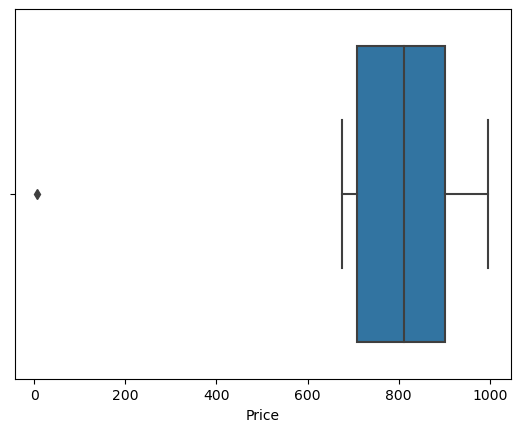

In [12]:
## Price 가 1000 미만인 값들의 box plot
sns.boxplot(x = df['Price'][df['Price'] < 1000])

In [13]:
df.drop(df['Price'][df['Price'] < 100].index, axis = 0 , inplace = True)

<Axes: xlabel='Price', ylabel='Count'>

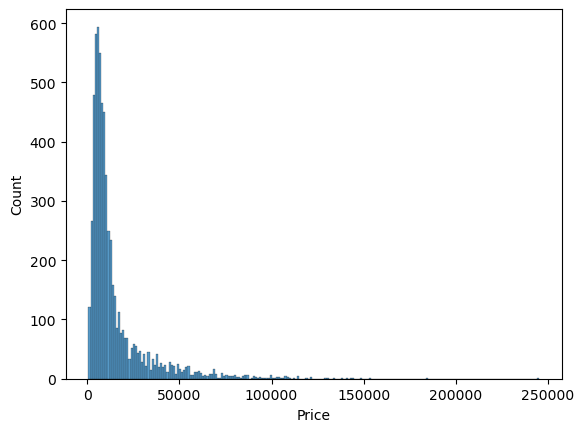

In [14]:
sns.histplot(df['Price'])

### 결측치 제거

In [15]:
## 결측치 비율 확인
price_null = pd.DataFrame(index = ['계'])
price_null['결측치 개수'] = [df['Price'].isnull().sum()]
price_null['결측치 비율'] = [df['Price'].isnull().sum() / len(df['Price'])]

_temp = price_null
_temp

,결측치 개수,결측치 비율
계,1053,0.145201


In [16]:
df.shape

(7252, 13)

In [17]:
df.drop(df[df['Price'].isnull()].index, axis = 0,inplace = True)

df.shape
df['Price'].isnull().sum()

0

### log 변환

<Axes: xlabel='Price', ylabel='Count'>

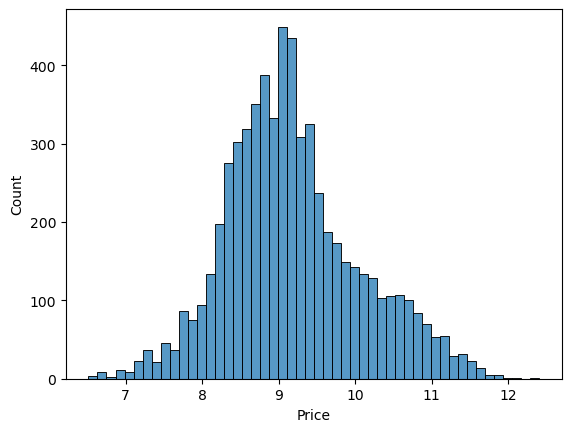

In [18]:
## log 변환
df['Price'] = np.log(df['Price'])

## plot
sns.histplot(df['Price'])

## Year

In [19]:
_temp = pd.DataFrame(df['Year'].describe())
_temp

,Year
count,6199.000000
mean,2013.433457
std,3.271719
min,1998.000000
25%,2012.000000
50%,2014.000000
75%,2016.000000
max,2019.000000


<Axes: xlabel='Year', ylabel='Count'>

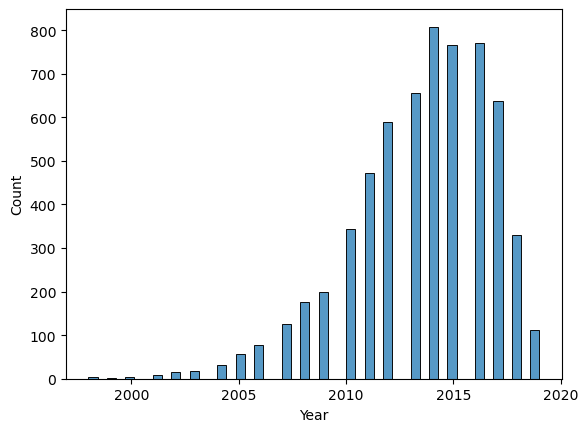

In [20]:
## histplot
sns.histplot(df['Year'])

<Axes: xlabel='Year'>

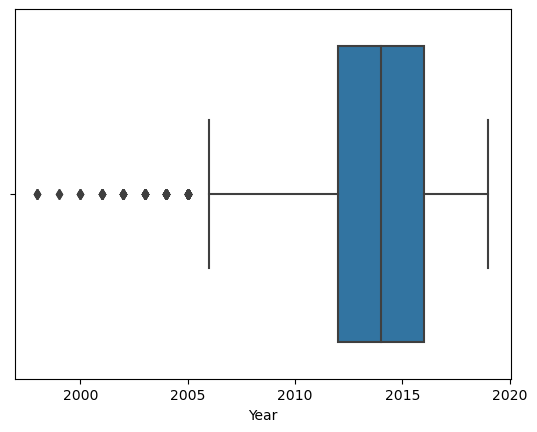

In [21]:
## boxplot
sns.boxplot(x = df['Year'])

Text(0.5, 1.0, 'Price vs. Year')

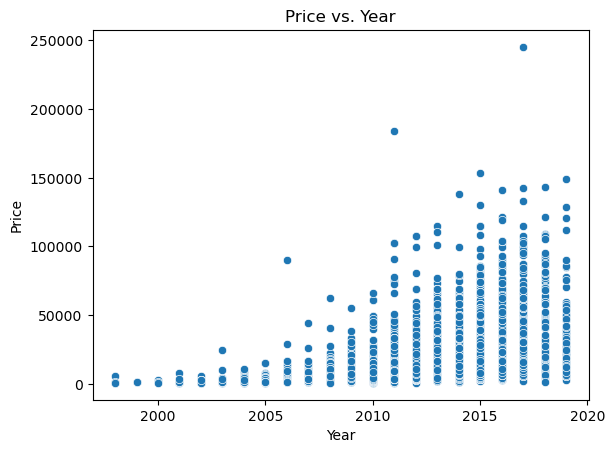

In [22]:
## Price vs. Year
sns.scatterplot(y = np.exp(df['Price']) , x = df['Year'])
plt.title('Price vs. Year')

## Kilometers_Driven

In [23]:
pd.options.display.float_format = '{:.2f}'.format

In [24]:
_temp = pd.DataFrame(df['Kilometers_Driven'].describe())
_temp

,Kilometers_Driven
count,6199.00
mean,58162.90
std,90112.49
min,171.00
25%,33000.00
50%,52516.00
75%,72302.00
max,6500000.00


In [25]:
pd.reset_option('display.float_format')

<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

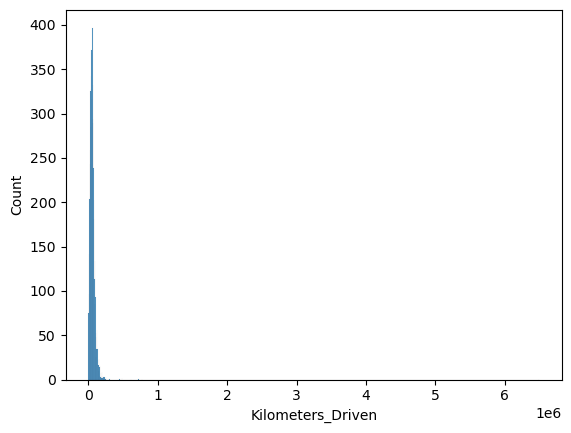

In [26]:
## histplot
sns.histplot(df['Kilometers_Driven'])

Text(0.5, 1.0, 'Before')

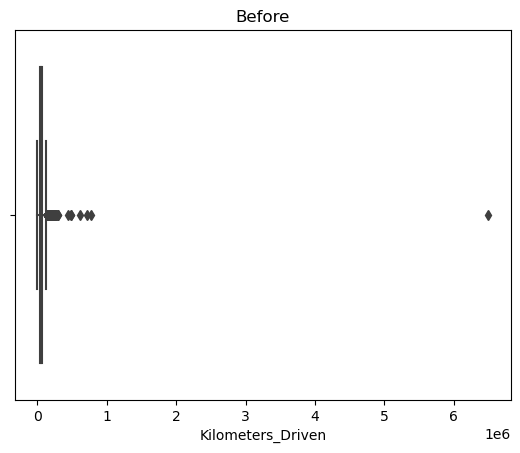

In [27]:
## box plot
sns.boxplot(x = df['Kilometers_Driven'])
plt.title('Before')

In [28]:
df[df['Kilometers_Driven'] > 6000000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2328,BMW X5 xDrive 30d M Sport,Chennai,11.509343,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN


([], [])

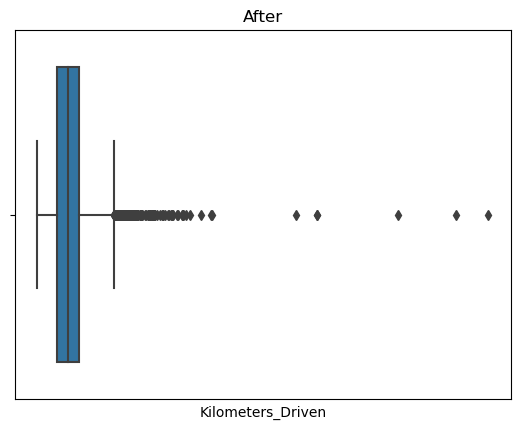

In [29]:
df_New_Price = df[df['Kilometers_Driven'] <= 6000000]
df = df[df['Kilometers_Driven'] <= 6000000]

sns.boxplot(x = df['Kilometers_Driven'])
plt.xlabel('Kilometers_Driven')
plt.title('After')
plt.xticks([])


<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

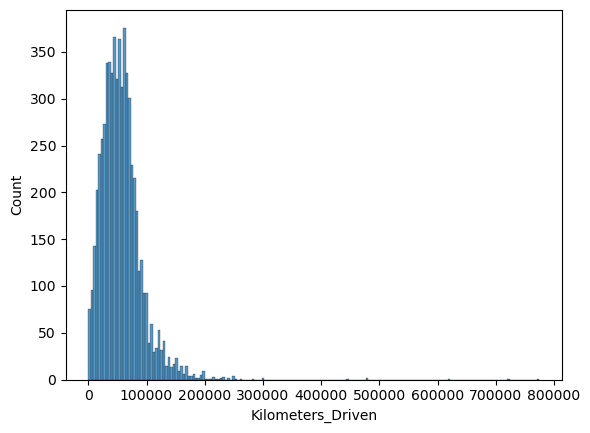

In [30]:
sns.histplot(df['Kilometers_Driven'])

- histogram 과 boxplot을 확인해 본 결과 조금 더 이상치 제거를 해도 될 것으로 보인다.
- 300000 보다 높은 것의 개수를 세어본뒤, 총 데이터의 1%가 넘지 않으면 제거하도록 하겠다.

In [31]:
df[df['Kilometers_Driven'] > 300000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,9.349859,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN
358,Hyundai i10 Magna 1.2,Chennai,8.328207,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN
1860,Volkswagen Vento Diesel Highline,Chennai,9.109908,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,9.899905,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN
3092,Honda City i VTEC SV,Kolkata,8.944394,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN
4491,Hyundai i20 Magna Optional 1.2,Bangalore,8.827860,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN


In [32]:
print('주행거리가 300,000 km 이상인 데이터의 비율 : {:.5f}'.format(len(df[df['Kilometers_Driven'] > 300000])/df.shape[0]))

주행거리가 300,000 km 이상인 데이터의 비율 : 0.00097


- 주행거리가 300,000 km 이상인 데이터의 비율이 매우 적으므로 이상치로 판단하여 삭제하도록 하겠다.

In [33]:
df = df[df['Kilometers_Driven'] < 300000]

Text(0.5, 1.0, 'Final_Kilometers_Driven')

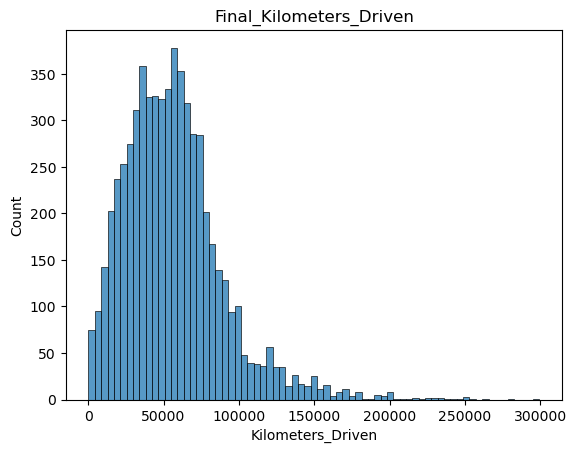

In [34]:
sns.histplot(df['Kilometers_Driven'])
plt.title('Final_Kilometers_Driven')

Text(0.5, 1.0, 'Kilometers_Driven vs. Price')

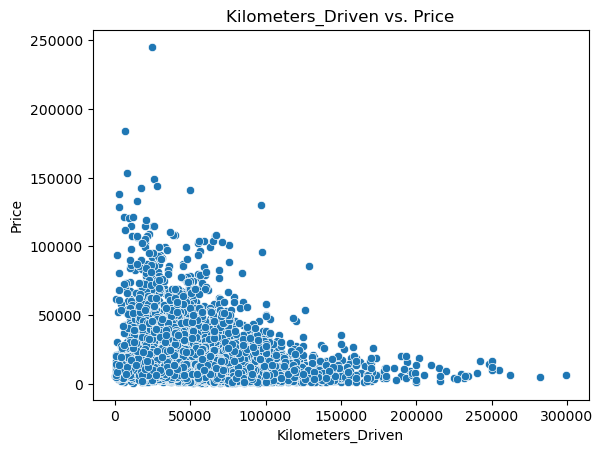

In [35]:
sns.scatterplot(x= df['Kilometers_Driven'] , y = np.exp(df['Price']))
plt.title('Kilometers_Driven vs. Price')


- 이상치를 제거한 뒤 확인한 결과 그래프가 왼쪽으로 치우친 형태를 그리고 있다.

## Mileage

### Mileage 0인 이상치 채워주기

In [36]:
mile = pd.DataFrame(index = ['계'])

mile['이전'] = len(df['Mileage'])
mile

,이전
계,6191


In [37]:
_temp = pd.DataFrame(df['Mileage'].describe()).round(3)
_temp

,Mileage
count,6189.000
mean,18.183
std,4.581
min,0.000
25%,15.260
50%,18.200
75%,21.100
max,33.540


<Axes: xlabel='Mileage', ylabel='Count'>

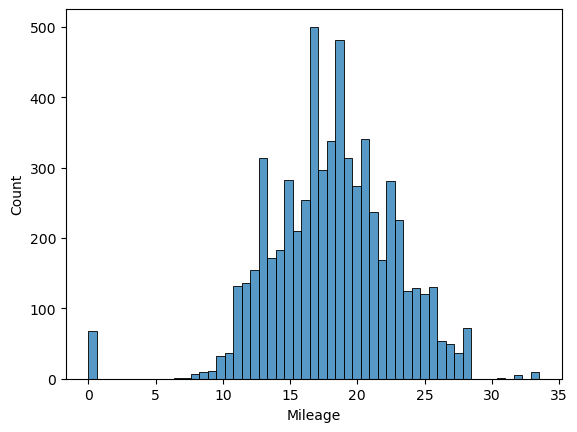

In [38]:
sns.histplot(df['Mileage'])

<Axes: xlabel='Mileage'>

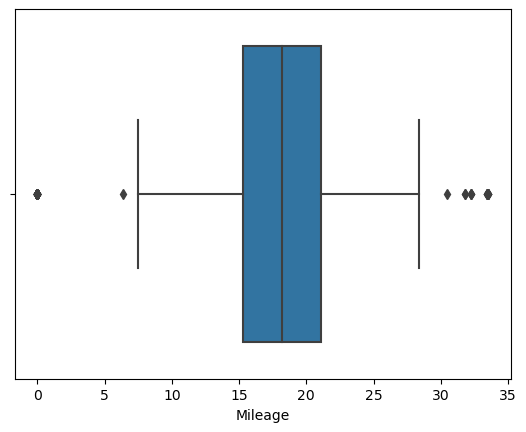

In [39]:
sns.boxplot(x =df['Mileage'])

In [40]:
df[df['Mileage'] == 0]['Fuel_Type'].value_counts()

Fuel_Type
Petrol    41
Diesel    27
Name: count, dtype: int64

- Mileage가 0인 값들 중 0이 아닌 값들의 자동차 이름과 같은 행을 찾아 Mileage값을 채워준다.
- 만약 자동차 이름과 같은 행이 없다면, 연비는 각각의 fuel type의 평균과 비슷할 것이라고 생각되어 채워준다.

In [41]:
mile_na = df[df['Mileage'] == 0]['Name']
mile_fuel = df.groupby('Fuel_Type')['Mileage'].mean()

for i in mile_na.index:
    if df.loc[i,'Name'] in df[df['Mileage'] > 0]['Name'].to_list():
        df.loc[i,'Mileage'] = df[(df['Name'] == df.loc[i,'Name']) & (df['Mileage'] > 0)]['Mileage'].iloc[0]
    else:
        if df.loc[i,'Fuel_Type'] == 'Diesel':
            df.loc[i,'Mileage'] = mile_fuel['Diesel']
        elif df.loc[i,'Fuel_Type'] == 'Petrol':
            df.loc[i,'Mileage'] = mile_fuel['Petrol']

df[df['Mileage'] ==0]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


In [42]:
## 결측치 확인

df[df['Mileage'].isnull()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
4446,Mahindra E Verito D4,Chennai,9.899905,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,21429.24
4904,Toyota Prius 2009-2016 Z4,Mumbai,9.880487,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN


In [43]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3296
Petrol      2826
CNG           57
LPG           10
Electric       2
Name: count, dtype: int64

- Mileage 가 0인 값을 확인해 보니 Fuel_Type이 Electric으로 전기차임을 알 수 있었다. 또한 전기차는 데이터 내에 2대 밖에 존재하지 않으므로 삭제하도록 하겠다.

In [44]:
df = df.drop(df[df['Mileage'].isnull()].index, axis = 0)

Text(0.5, 1.0, 'Mileage_Outlier_removed')

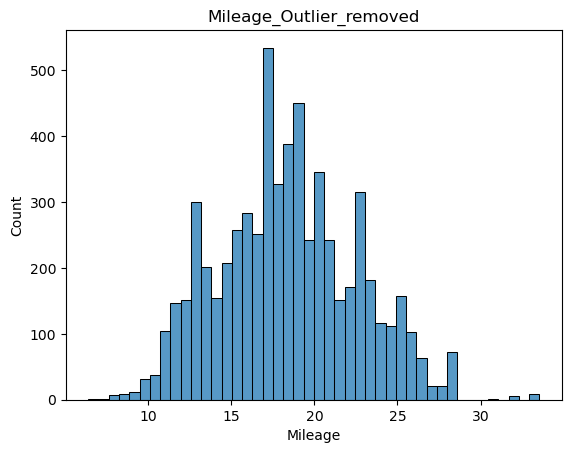

In [45]:
sns.histplot(df['Mileage'])
plt.title('Mileage_Outlier_removed')

In [46]:
mile['이후'] = len(df['Mileage'])
mile

,이전,이후
계,6191,6189


Text(0.5, 1.0, 'Mileage vs. Price')

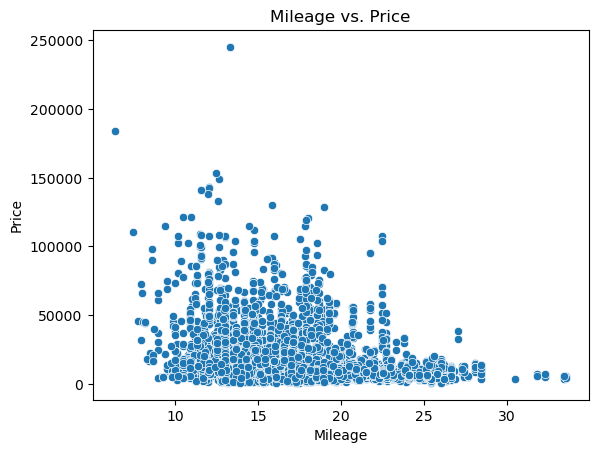

In [47]:
sns.scatterplot(x = df['Mileage'] , y = np.exp(df['Price']))
plt.title('Mileage vs. Price')

## Engine

In [48]:
engines = pd.DataFrame(index = ['계'])
engines['삭제 이전'] = len(df['Engine'])


In [49]:
_temp = pd.DataFrame(df['Engine'].describe())
_temp

,Engine
count,6153.000000
mean,1620.154884
std,601.334518
min,624.000000
25%,1198.000000
50%,1493.000000
75%,1984.000000
max,5998.000000


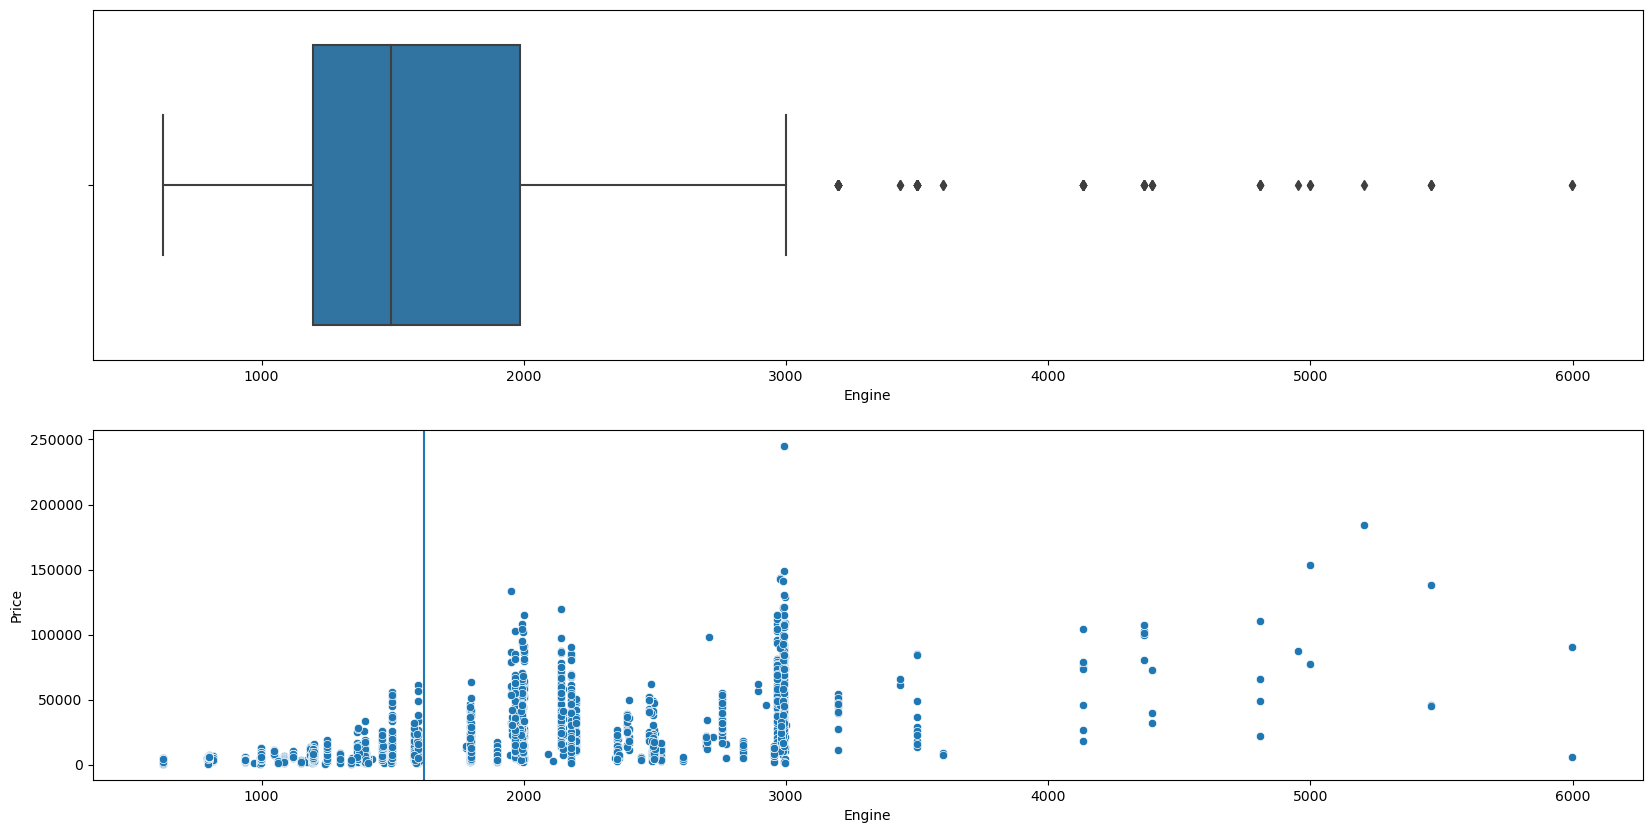

In [50]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
sns.boxplot(x = df['Engine'])
plt.subplot(2,1,2)
sns.scatterplot(x = df['Engine'],y= np.exp(df['Price']))
plt.axvline(df['Engine'].mean())
plt.show()

- 데이터들을 직접 확인하여 높은 배기량을 가지는 데이터들의 도메인 지식을 활용한 결과 결측치나 이상치가 아닌 것으로 판단되어
- 데이터의 다양성을 유지하기 위해 EDA를 통해서는 이상치를 제거하지 않도록 하겠다.

In [51]:
_temp = df[df['Engine'].isnull()]
display(_temp.head(5))
print(_temp.isnull().sum())

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
194,Honda City 1.5 GXI,Ahmedabad,8.416761,2007,60006,Petrol,Manual,First,12.800000,NaN,NaN,NaN,NaN
208,Maruti Swift 1.3 VXi,Kolkata,8.081645,2010,42001,Petrol,Manual,First,16.100000,NaN,NaN,NaN,NaN
733,Maruti Swift 1.3 VXi,Chennai,7.894572,2006,97800,Petrol,Manual,Third,16.100000,NaN,NaN,NaN,NaN
749,Land Rover Range Rover 3.0 D,Mumbai,10.612101,2008,55001,Diesel,Automatic,Second,18.659539,NaN,NaN,NaN,NaN
1294,Honda City 1.3 DX,Delhi,8.498106,2009,55005,Petrol,Manual,First,12.800000,NaN,NaN,NaN,NaN


Name                  0
Location              0
Price                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                36
New_Price            36
dtype: int64


In [52]:
engine_na = df[df['Engine'].isnull()]['Name']
engine_fuel = df.groupby('Fuel_Type')['Engine'].mean()

for i in engine_na.index:
    if df.loc[i,'Name'] in df[df['Engine'].notnull()]['Name'].to_list():
        df.loc[i,'Engine'] = df[(df['Name'] == df.loc[i,'Name']) & (df['Engine'].notnull())]['Engine'].iloc[0]
    else:
        df.drop(i, axis = 0, inplace = True)

df[df['Engine'].isnull()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


- 데이터를 확인해 보니 36개의 데이터 결측치가 존재하는 것을 알 수 있다.
- 따라서 앞선 작업과 비슷하게 이름이 같은 회사가 존재하는 경우 그 회사의 Engine을 넣고, 없을 경우 알 수 있는 방법이 현재로썬 힘드므로
- 제거해주도록 하겠다.

In [53]:
df['Engine'].isnull().sum()

0

In [54]:
df.isnull().sum()

Name                    0
Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                 112
Seats                  11
New_Price            5155
dtype: int64

In [55]:
engines['삭제 이후'] = df.shape[0]
engines

,삭제 이전,삭제 이후
계,6189,6158


Text(0.5, 1.0, 'Engine vs. Price')

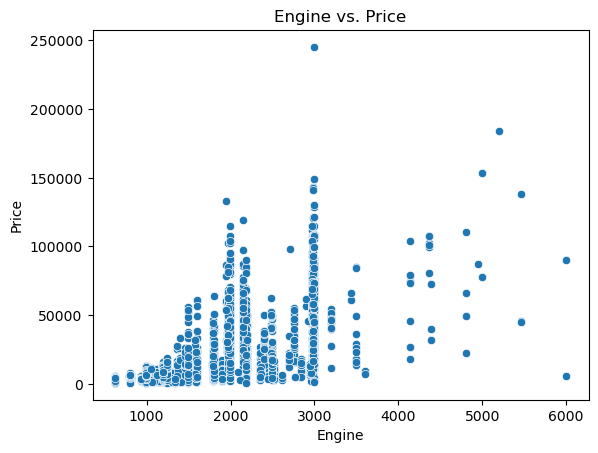

In [56]:
sns.scatterplot(x = df['Engine'] , y = np.exp(df['Price']))
plt.title('Engine vs. Price')

## Power


In [57]:
_temp = pd.DataFrame(df['Power'].describe())
_temp

,Power
count,6046.000000
mean,113.323118
std,54.166353
min,34.200000
25%,75.000000
50%,97.650000
75%,138.100000
max,616.000000


<Axes: xlabel='Power', ylabel='Price'>

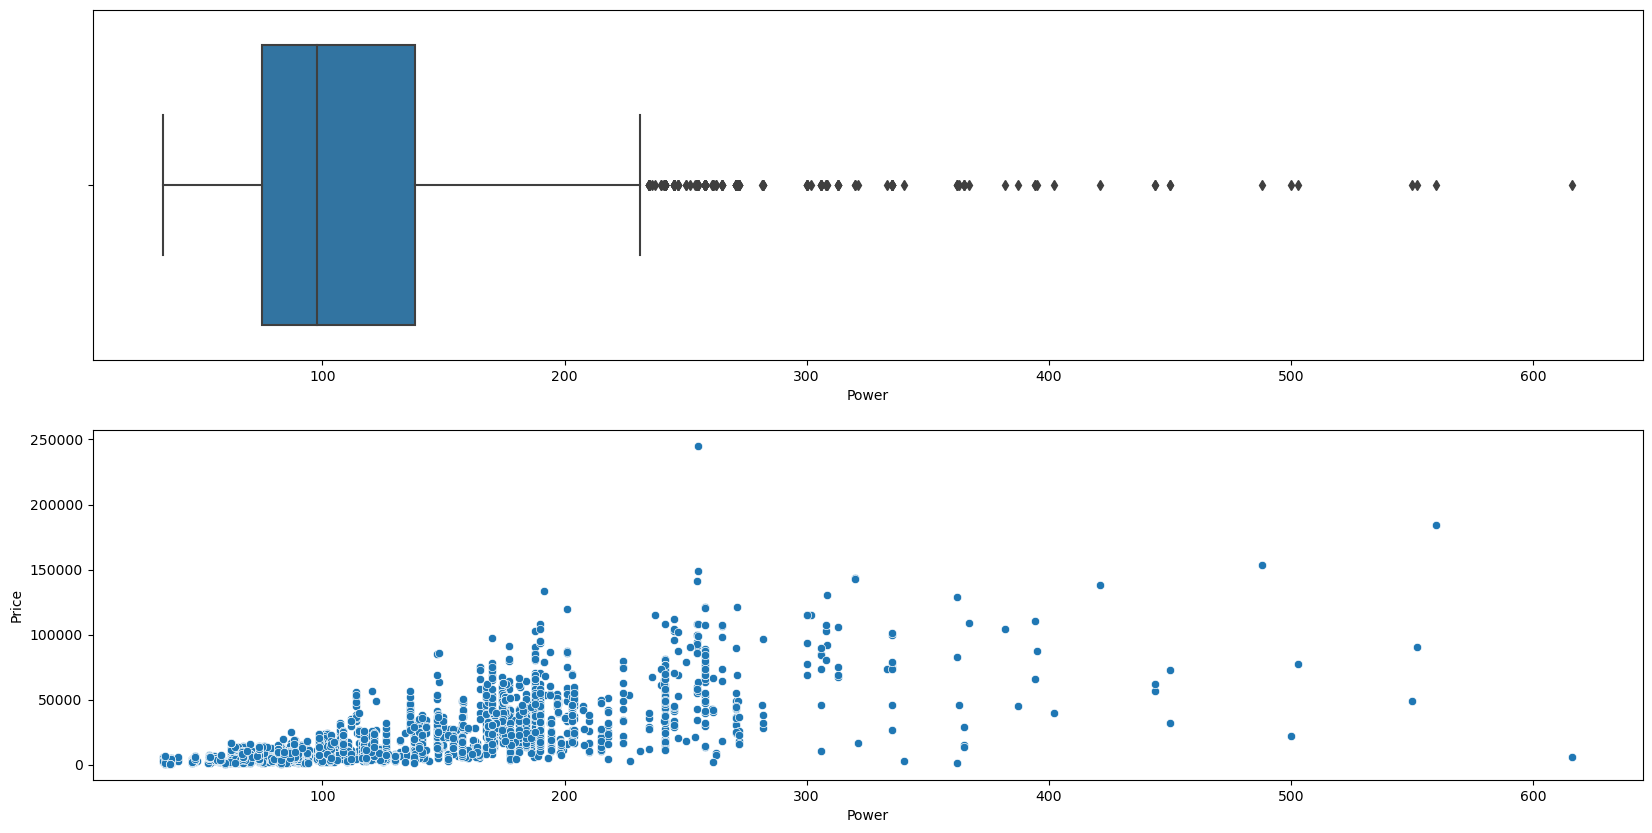

In [58]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
sns.boxplot(x =df['Power'])
plt.subplot(2,1,2)
sns.scatterplot(x = df['Power'], y = np.exp(df['Price']))

- 데이터들을 직접 확인하여 높은 bhp을 가지는 데이터들의 도메인 지식을 활용한 결과 결측치나 이상치가 아닌 것으로 판단되어
- 데이터의 다양성을 유지하기 위해 EDA를 통해서는 이상치를 제거하지 않도록 하겠다.

### 결측치 제거

In [59]:
power = pd.DataFrame(index = ['계'])
power['삭제 이전'] = len(df['Power'])


In [60]:
_temp = df[df['Power'].isnull()].head(5)
_temp

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,8.028103,2008,111111,Diesel,Manual,First,17.800000,1399.0,NaN,5.0,NaN
79,Hyundai Santro Xing XL,Hyderabad,7.597321,2005,87591,Petrol,Manual,First,17.475237,1086.0,NaN,5.0,NaN
89,Hyundai Santro Xing XO,Hyderabad,8.076894,2007,73745,Petrol,Manual,First,17.000000,1086.0,NaN,5.0,NaN
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,7.172440,2005,102000,Petrol,Manual,Second,17.000000,1086.0,NaN,5.0,NaN
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,7.847778,2008,80759,Petrol,Manual,Third,17.000000,1086.0,NaN,5.0,NaN


In [61]:
power_na = df[df['Power'].isnull()]['Name']
power_name = df[df['Power'].notnull()]['Name'].value_counts().index.to_list()
for i in power_na.index:
    if df.iloc[i,0] in power_name:
        df.loc[i,'Power'] = df[(df['Name'] == df.iloc[i,0]) & (df['Power'].notnull())]['Power'].iloc[0]
    else:
        df.drop(i, axis = 0, inplace = True)

- 앞선 Mileage와 같이 결측치인 값들 중 결측치가 아닌 값들의 자동차 이름과 같은 행을 찾아 Power값을 채워준다.
- 만약 자동차 이름과 같은 행이 없다면, 이는 채워주기 어려우므로 데이터를 삭제하도록하겠다.

In [62]:
power['삭제 이후'] = len(df['Power'])
power

,삭제 이전,삭제 이후
계,6158,6154


Text(0.5, 1.0, 'Power vs. Price')

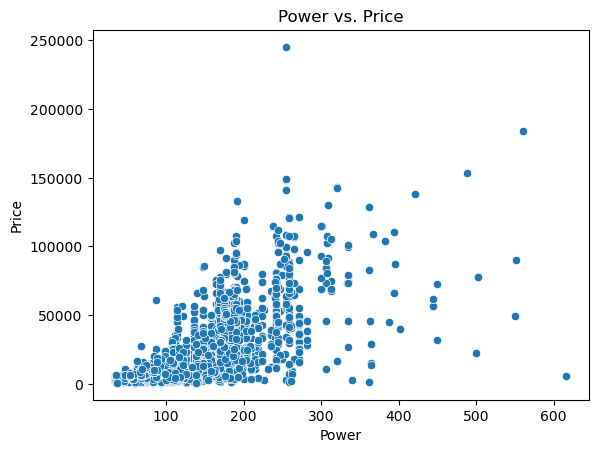

In [63]:
sns.scatterplot(x = df['Power'], y = np.exp(df['Price']))
plt.title('Power vs. Price')

## Seat

In [64]:
_temp = pd.DataFrame(df['Seats'].describe())
_temp

,Seats
count,6143.00000
mean,5.27918
std,0.80924
min,0.00000
25%,5.00000
50%,5.00000
75%,5.00000
max,10.00000


Text(0.5, 1.0, 'Seats vs. count')

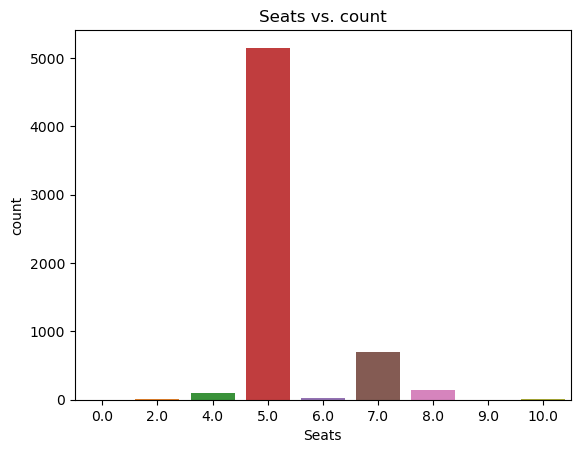

In [65]:
sns.countplot(x =df['Seats'])
plt.title('Seats vs. count')

Text(0.5, 1.0, 'Seats vs. means')

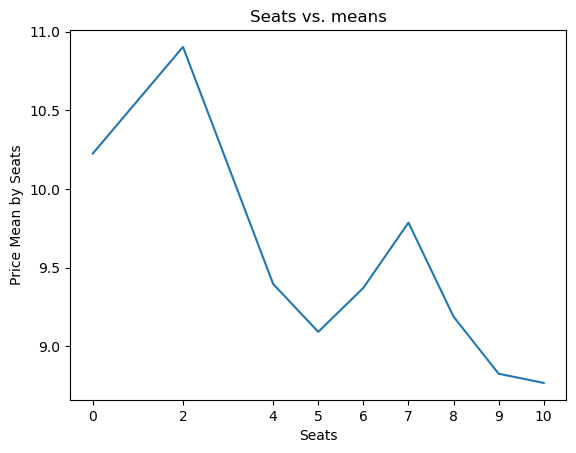

In [66]:
x = df.groupby('Seats')['Price'].mean().index
y = df.groupby('Seats')['Price'].mean().values
sns.lineplot(x=x,y=y)
plt.xticks(x)
plt.ylabel('Price Mean by Seats')
plt.title('Seats vs. means')


- 좌석 수에 따라 Price의 평균값이 다른 것으로 보아 Seats의 개수는 Price를 예측하는데 좋은 변수가 될 것 같다.
- 따라서 이를 모델의 변수에 추가해주도록 하겠다.

In [67]:
_temp = df[df['Seats'] == 0]

- 좌석 수가 0인 값이 1개 이므로 삭제해주도록 하곘다.

In [69]:
df.drop(df[df['Seats'] == 0].index , axis = 0, inplace = True)

- 이상치 제거 완료!

In [70]:
_temp = df[df['Seats'].isnull()].head(5)
_temp

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
194,Honda City 1.5 GXI,Ahmedabad,8.416761,2007,60006,Petrol,Manual,First,12.800000,1493.0,98.6,NaN,NaN
229,Ford Figo Diesel,Bangalore,8.615890,2015,70436,Diesel,Manual,First,18.659539,1498.0,99.0,NaN,NaN
1385,Honda City 1.5 GXI,Pune,7.740421,2004,115000,Petrol,Manual,Second,12.800000,1493.0,184.0,NaN,NaN
1917,Honda City 1.5 EXI,Jaipur,7.865583,2005,88000,Petrol,Manual,Second,13.000000,1493.0,100.0,NaN,NaN
2264,Toyota Etios Liva V,Pune,8.416761,2012,24500,Petrol,Manual,Second,18.300000,1197.0,174.5,NaN,NaN


In [72]:
seats = pd.DataFrame(index = ['계'])
seats['삭제 이전'] = len(df['Seats'])

print(df['Seats'].isnull().sum())

11


In [73]:
seats_na = df[df['Seats'].isnull()]['Name']
seats_name = df[df['Seats'].notnull()]['Name'].value_counts().index.to_list()
for i in seats_na.index:
    if df.iloc[i,0] in seats_name:
        df.loc[i,'Seats'] = df[(df['Name'] == df.iloc[i,0]) & (df['Seats'].notnull())]['Seats'].iloc[0]
    else:
        df.drop(i, axis = 0, inplace = True)

In [74]:
seats['삭제 이후'] = len(df['Seats'])
print(df['Seats'].isnull().sum())

0


In [75]:
df.isnull().sum()

Name                    0
Location                0
Price                   0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5150
dtype: int64

### New_Price

In [76]:
df['New_Price'].fillna(0,inplace = True)
df['New_Price'] = np.where(df['New_Price'] > 0 , -1, 0)
df['New_Price']

0       0
1       0
2      -1
3       0
4       0
       ..
7224   -1
7228   -1
7231   -1
7232   -1
7235   -1
Name: New_Price, Length: 6153, dtype: int64

<Axes: xlabel='New_Price', ylabel='count'>

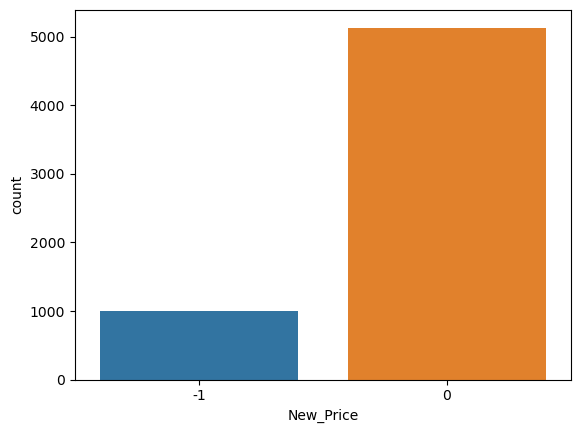

In [161]:
df['New_Price'].value_counts().values
sns.countplot(x = df['New_Price'])


# 범주형 자료 EDA

In [77]:
df_cat_col

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

## Name

In [78]:
df['Name'] = df['Name'].str.split().str[0]

df['Name'].replace('Mercedes-Benz', 'Mercedes_Benz',inplace = True)
# Name 을 Brand로 이름 변환
cols_temp = df.columns.to_list()
cols_temp[0] = 'Brand'
df.columns = cols_temp

df['Brand'].value_counts()

Brand
Maruti           1243
Hyundai          1117
Honda             618
Toyota            422
Mercedes_Benz     325
Volkswagen        318
Ford              303
Mahindra          281
BMW               267
Audi              240
Tata              194
Skoda             181
Renault           151
Chevrolet         121
Nissan             95
Land               57
Jaguar             43
Mitsubishi         34
Mini               29
Fiat               28
Volvo              21
Jeep               19
Porsche            18
Datsun             17
ISUZU               3
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Name: count, dtype: int64

In [79]:
_temp = df[['Brand']].head(10)
_temp

,Brand
0,Maruti
1,Hyundai
2,Honda
3,Maruti
4,Audi
5,Hyundai
6,Nissan
7,Toyota
8,Volkswagen
9,Tata


In [81]:
_temp = pd.DataFrame(index = df['Brand'].value_counts().index.to_list(),data = df['Brand'].value_counts()).tail(10)
_temp

,count
Volvo,21
Jeep,19
Porsche,18
Datsun,17
ISUZU,3
Force,3
Bentley,2
Smart,1
Ambassador,1
Lamborghini,1


- Datsun 보다 개수가 낮은 자동차들은 우리가 많이 보유하고 있지 않은 자동차라고 생각되고, 주된 고객층을 확보하기위해 Other로 분류하도록 하겠다.

In [83]:
## other 로 바꾸기
df['Brand'].replace(df['Brand'].value_counts().index[df['Brand'].value_counts() < 17], 'Other',inplace = True)

/var/folders/kg/2nf2sj7525b36vm0888t1whm0000gn/T/ipykernel_86941/886643888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_price['Price'] = np.exp(mean_price['Price'])


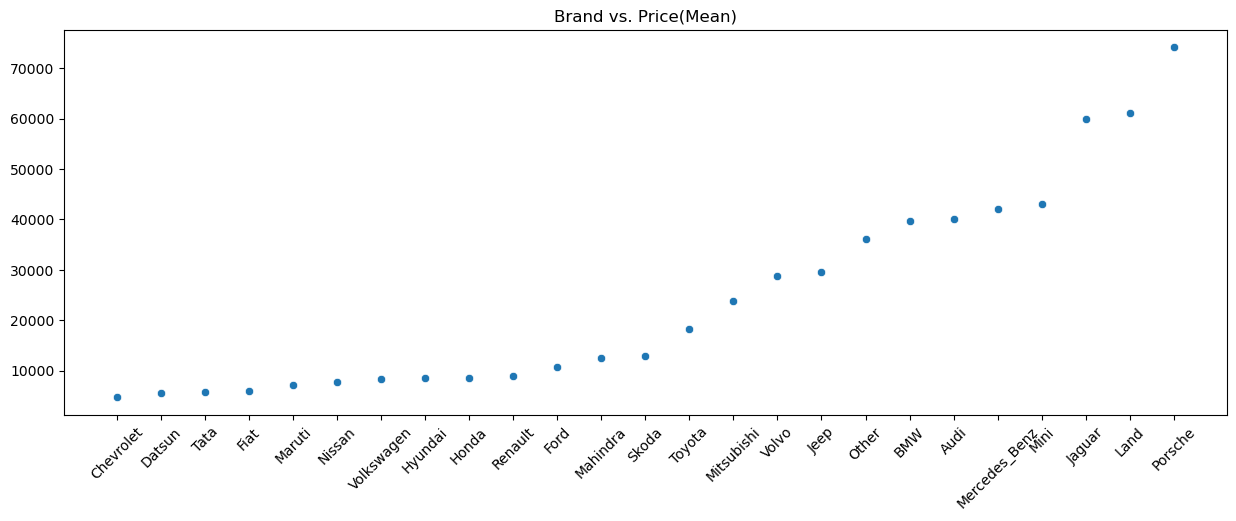

In [84]:
## name 별 price 평균
mean_price = df[['Brand','Price']]
mean_price['Price'] = np.exp(mean_price['Price'])
group_brand = mean_price.groupby('Brand')['Price'].mean().sort_values()
plt.figure(figsize = (15,5))
sns.scatterplot(x= group_brand.index.to_list(), y = group_brand.values)
plt.xticks(group_brand.index.to_list(), rotation = 45)
plt.title('Brand vs. Price(Mean)')
plt.show()

## Location

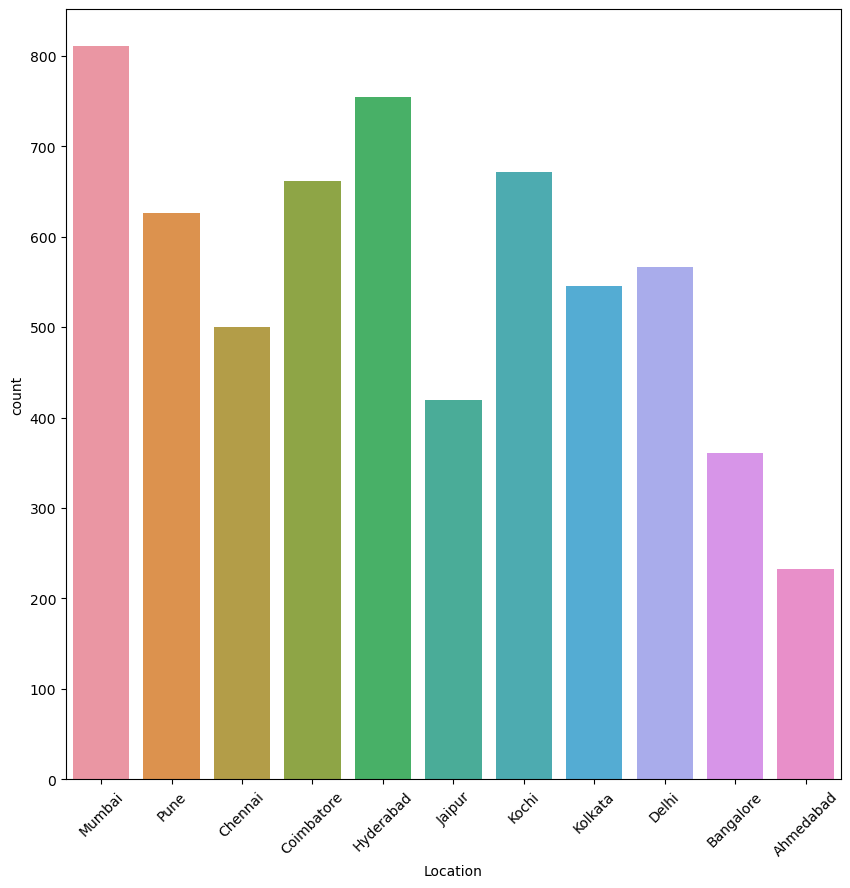

In [85]:
plt.figure(figsize = (10,10))
sns.countplot(x = df['Location'])
plt.xticks(rotation = 45)
plt.show()

/var/folders/kg/2nf2sj7525b36vm0888t1whm0000gn/T/ipykernel_86941/3633137380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_price['Price'] = np.exp(mean_price['Price'])


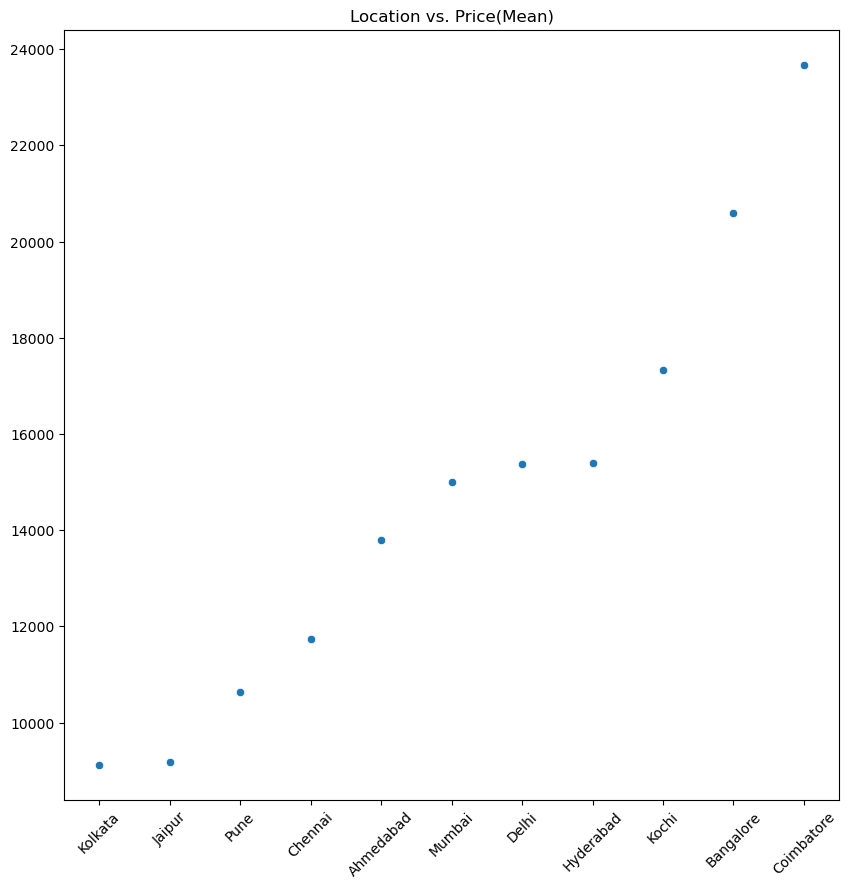

In [86]:
## name 별 price 평균
mean_price = df[['Location','Price']]
mean_price['Price'] = np.exp(mean_price['Price'])
group_brand = mean_price.groupby('Location')['Price'].mean().sort_values()
plt.figure(figsize = (10,10))
sns.scatterplot(x= group_brand.index.to_list(), y = group_brand.values)
plt.xticks(group_brand.index.to_list(), rotation = 45)
plt.title('Location vs. Price(Mean)')
plt.show()

## Fuel_Type

In [87]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel    3286
Petrol    2800
CNG         57
LPG         10
Name: count, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

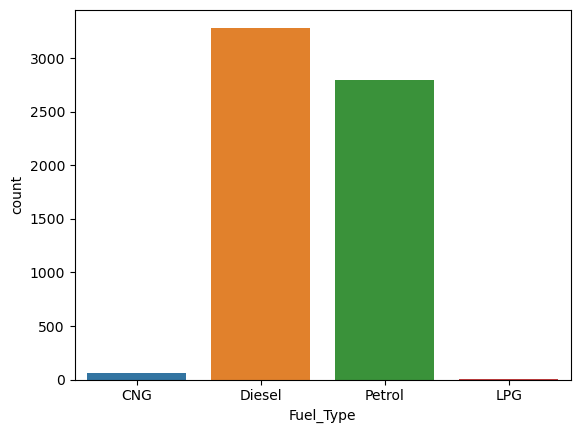

In [88]:
sns.countplot( x = df['Fuel_Type'])

- CNG 와 LPG가 Diesel 과 Petrol 에 비해서 매우 적은 비율을 차지하고 있다.
- 하지만 LPG는 30을 넘지 못하므로 모델에 전혀 영향을 끼치지 못한다고 생각되어 지우도록 하겠다.

In [89]:
df.drop(df[df['Fuel_Type'] == 'LPG'].index , axis = 0, inplace = True)

In [90]:
Fuel_mean = pd.DataFrame(index = ['CNG','Diesel','Petrol'])

# Price 원 상태로 변경
Fuel_price = df[['Fuel_Type','Price']]
Fuel_price['Price'] = np.exp(Fuel_price['Price'])

Fuel_mean['Price'] = Fuel_price.groupby('Fuel_Type')['Price'].mean()
Fuel_mean['Year'] = df.groupby('Fuel_Type')['Year'].mean()
Fuel_mean['Kilometers_Driven'] = df.groupby('Fuel_Type')['Kilometers_Driven'].mean()
Fuel_mean['Mileage'] = df.groupby('Fuel_Type')['Mileage'].mean()
Fuel_mean['Engine'] = df.groupby('Fuel_Type')['Engine'].mean()

Fuel_mean

/var/folders/kg/2nf2sj7525b36vm0888t1whm0000gn/T/ipykernel_86941/2643224459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fuel_price['Price'] = np.exp(Fuel_price['Price'])


,Price,Year,Kilometers_Driven,Mileage,Engine
CNG,5421.837193,2014.052632,55052.263158,25.538070,1089.421053
Diesel,20131.506102,2013.825320,64461.042301,18.812894,1858.882532
Petrol,9054.679986,2013.022500,47177.164643,17.742938,1351.794286


- CNG의 경우 Price 가 높은 편이 아니나 Mileage 가 가장 높게 나와 경제적인 자동차의 특징을 보이고 있다.
- Diesel의 경우 가격이 가장 높은 편이고, Kilometers_Driven또한 가장 높게 나왔다.
- Petrol은 Kilometer_Driven 이나 Mileage가 가장 낮게 나타나고 있다.

## Transmission

In [92]:
df['Transmission'].value_counts()

Transmission
Manual       4373
Automatic    1770
Name: count, dtype: int64

<Axes: xlabel='Transmission', ylabel='count'>

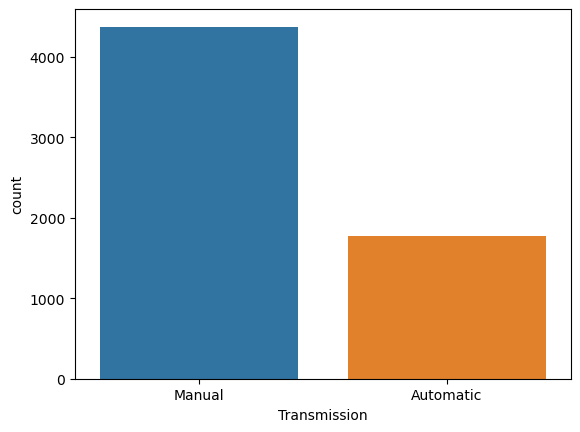

In [93]:
sns.countplot(x = df['Transmission'])

/var/folders/kg/2nf2sj7525b36vm0888t1whm0000gn/T/ipykernel_86941/3481291483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_transmission['Price'] = np.exp(mean_transmission['Price'])


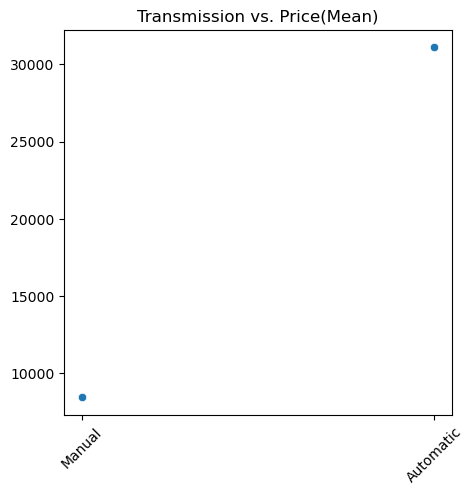

In [94]:
## transmission 별 price 평균
mean_transmission = df[['Transmission','Price']]
mean_transmission['Price'] = np.exp(mean_transmission['Price'])
group_trans = mean_transmission.groupby('Transmission')['Price'].mean().sort_values()
plt.figure(figsize = (5,5))
sns.scatterplot(x= group_trans.index.to_list(), y = group_trans.values)
plt.xticks(group_trans.index.to_list(), rotation = 45)
plt.title('Transmission vs. Price(Mean)')
plt.show()

## Owner_Type

In [95]:
df['Owner_Type'].value_counts()

Owner_Type
First             5051
Second             973
Third              111
Fourth & Above       8
Name: count, dtype: int64

<Axes: xlabel='Owner_Type', ylabel='count'>

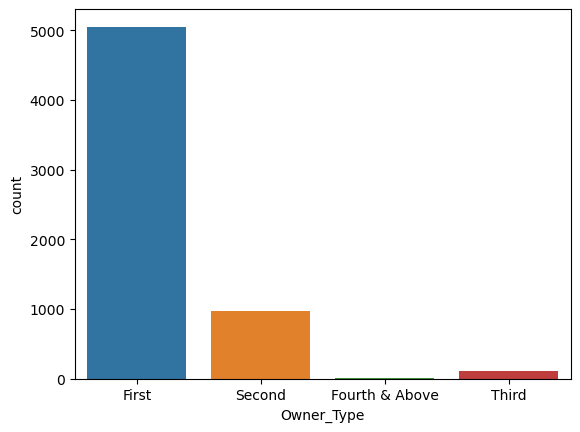

In [96]:
sns.countplot(x = df['Owner_Type'])

/var/folders/kg/2nf2sj7525b36vm0888t1whm0000gn/T/ipykernel_86941/2368252471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_owner['Price'] = np.exp(mean_owner['Price'])


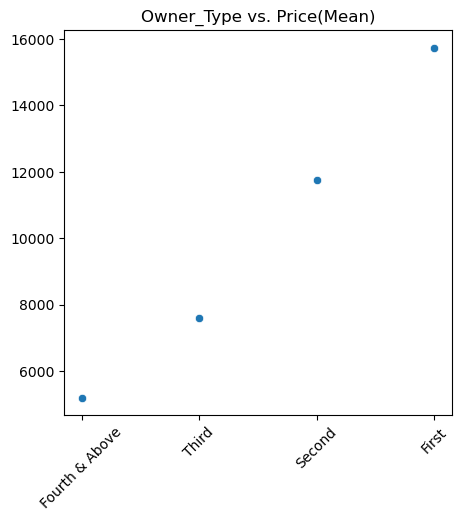

In [97]:
## owner_type 별 price 평균
mean_owner = df[['Owner_Type','Price']]
mean_owner['Price'] = np.exp(mean_owner['Price'])
group_owner = mean_owner.groupby('Owner_Type')['Price'].mean().sort_values()
plt.figure(figsize = (5,5))
sns.scatterplot(x= group_owner.index.to_list(), y = group_owner.values)
plt.xticks(group_owner.index.to_list(), rotation = 45)
plt.title('Owner_Type vs. Price(Mean)')
plt.show()

- Fourth & above 의 개수가 너무 낮게 나오고 가격부분에도 너무 적게 나오므로 제거해주도록 하겠다.

In [98]:
df.drop(df[df['Owner_Type'] == 'Fourth & Above'].index , axis = 0 ,inplace = True)

## Power vs. Engine

In [99]:
df_num_col.remove('Price')
num_col_heat = df[df_num_col].corr()
num_col_heat

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price
Year,1.000000,-0.504145,0.294870,-0.054790,0.009761,0.014252,-0.328664
Kilometers_Driven,-0.504145,1.000000,-0.160145,0.173154,0.004044,0.238880,0.214354
Mileage,0.294870,-0.160145,1.000000,-0.640373,-0.545913,-0.347052,-0.137587
Engine,-0.054790,0.173154,-0.640373,1.000000,0.853402,0.394503,0.008123
Power,0.009761,0.004044,-0.545913,0.853402,1.000000,0.096031,-0.048694
Seats,0.014252,0.238880,-0.347052,0.394503,0.096031,1.000000,-0.010731
New_Price,-0.328664,0.214354,-0.137587,0.008123,-0.048694,-0.010731,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

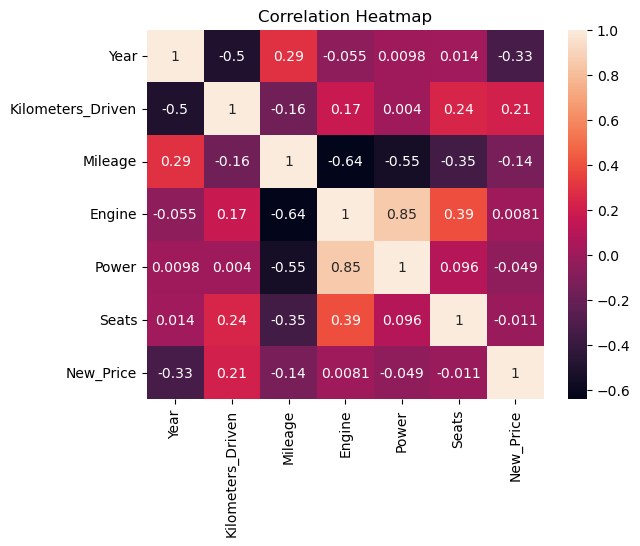

In [100]:
sns.heatmap(num_col_heat , annot = True)
plt.title('Correlation Heatmap')

<Axes: xlabel='Power', ylabel='Engine'>

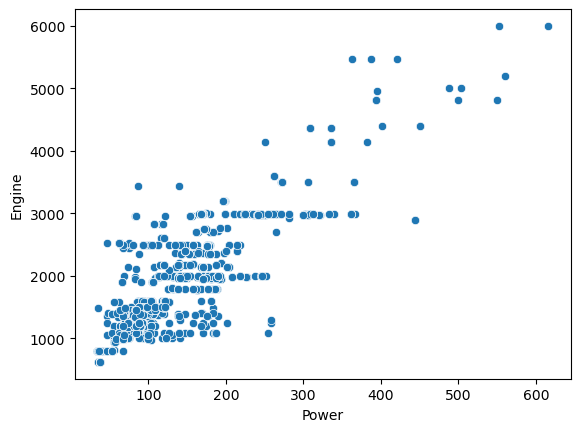

In [101]:
sns.scatterplot(x= df['Power'],y= df['Engine'])

In [102]:
df.drop('Engine', axis = 1 ,inplace = True)
df_num_col.remove('Engine')

### 상관관계 재확인

In [103]:
df[df_num_col].corr()

,Year,Kilometers_Driven,Mileage,Power,Seats,New_Price
Year,1.000000,-0.504145,0.294870,0.009761,0.014252,-0.328664
Kilometers_Driven,-0.504145,1.000000,-0.160145,0.004044,0.238880,0.214354
Mileage,0.294870,-0.160145,1.000000,-0.545913,-0.347052,-0.137587
Power,0.009761,0.004044,-0.545913,1.000000,0.096031,-0.048694
Seats,0.014252,0.238880,-0.347052,0.096031,1.000000,-0.010731
New_Price,-0.328664,0.214354,-0.137587,-0.048694,-0.010731,1.000000


- 다른 변수들과 상관과계는 0.5정도로 어느정도 상관성이 있으나, 조금 더 파악한뒤 지울지 판단해 보도록하겠다.

## 범주형 자료간 연관성 파악

In [104]:
df_cat_col.remove('Name')
df_cat_col.append('Brand')

### Location vs. Fuel_Type

In [105]:
# 크로스 테이블 생성
_temp = df.columns.to_list()
columns = df.columns
result = []
for i in columns:
    for j in _temp:
        if i != j:
            cross_table = pd.crosstab(df[i], df[j])
            # 카이제곱 검정 실행
            chi2, p, dof, expected = chi2_contingency(cross_table)
            # 결과 출력
            if p > 0.05:
                print("{} 와 {} 간의 카이제곱 검정 결과 : p-value = {:.5f}".format(i,j,p))
                result.append(i)
                result.append(j)
    _temp.remove(i)

Brand 와 Kilometers_Driven 간의 카이제곱 검정 결과 : p-value = 1.00000
Location 와 Kilometers_Driven 간의 카이제곱 검정 결과 : p-value = 0.66643
Price 와 Owner_Type 간의 카이제곱 검정 결과 : p-value = 1.00000
Year 와 Kilometers_Driven 간의 카이제곱 검정 결과 : p-value = 1.00000
Kilometers_Driven 와 Transmission 간의 카이제곱 검정 결과 : p-value = 0.79797
Kilometers_Driven 와 Owner_Type 간의 카이제곱 검정 결과 : p-value = 1.00000
Kilometers_Driven 와 Mileage 간의 카이제곱 검정 결과 : p-value = 1.00000
Kilometers_Driven 와 Power 간의 카이제곱 검정 결과 : p-value = 1.00000
Fuel_Type 와 New_Price 간의 카이제곱 검정 결과 : p-value = 0.94999
Transmission 와 Owner_Type 간의 카이제곱 검정 결과 : p-value = 0.22664


In [106]:
for i in df.columns:
    if i not in set(result):
        print(i)

Seats


- Seats 가 다른 변수들과 독립적이지 않으므로 삭제하도록 하겠다.

In [107]:
df_multi_corr = df.drop(['Seats'], axis = 1)
df_multi_corr

,Brand,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,New_Price
0,Maruti,Mumbai,7.894572,2010,72000,CNG,Manual,First,26.60,58.16,0
1,Hyundai,Pune,9.860684,2015,41000,Diesel,Manual,First,19.67,126.20,0
2,Honda,Chennai,8.839033,2011,46000,Petrol,Manual,First,18.20,88.70,-1
3,Maruti,Chennai,9.126715,2012,87000,Diesel,Manual,First,20.77,88.76,0
4,Audi,Coimbatore,10.210778,2013,40670,Diesel,Automatic,Second,15.20,140.80,0
...,...,...,...,...,...,...,...,...,...,...,...
7224,Datsun,Chennai,9.045144,2016,36000,Petrol,Manual,First,19.83,67.00,-1
7228,Tata,Pune,9.289401,2016,41413,Diesel,Manual,First,27.28,69.00,-1
7231,Ford,Kochi,9.508571,2017,39015,Petrol,Manual,First,17.00,121.36,-1
7232,Jeep,Mumbai,10.234177,2018,6000,Petrol,Manual,First,16.00,160.00,-1


## x, y, 분류

In [108]:
df_x = df_multi_corr.drop(['Price'], axis = 1)
df_y = df_multi_corr['Price']
df_num_col.remove('Seats')


In [109]:
df_x

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,New_Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,58.16,0
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,126.20,0
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,88.70,-1
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,88.76,0
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,140.80,0
...,...,...,...,...,...,...,...,...,...,...
7224,Datsun,Chennai,2016,36000,Petrol,Manual,First,19.83,67.00,-1
7228,Tata,Pune,2016,41413,Diesel,Manual,First,27.28,69.00,-1
7231,Ford,Kochi,2017,39015,Petrol,Manual,First,17.00,121.36,-1
7232,Jeep,Mumbai,2018,6000,Petrol,Manual,First,16.00,160.00,-1


## scaling 시작

In [110]:
scaler = RobustScaler()
df_x[df_num_col] = scaler.fit_transform(df_x[df_num_col])
_temp = df_x.head(10)

- EDA로 분석하지 못한 혹시 모를 이상치에 영향을 덜 받기 위해 RobustScaler를 적용시키도록 하겠다.

## train test split 분리

In [112]:
df_train_x, df_test_x , df_train_y, df_test_y = train_test_split(df_x,df_y,test_size = 0.3, random_state = 42)
print('y : {} , x : {}'.format(df_train_y.shape , df_train_x.shape))
print('y : {} , x : {}'.format(df_test_y.shape , df_test_y.shape))

# _temp = pd.DataFrame()
# _temp['x']


y : (4294,) , x : (4294, 10)
y : (1841,) , x : (1841,)


# 다중공선성 확인

In [113]:
df_train_x_const = add_constant(df_train_x[df_num_col])
vif = pd.DataFrame()
vif["Variables"] = df_train_x_const.columns
vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
vif

,Variables,VIF
0,const,1.430859
1,Year,1.581234
2,Kilometers_Driven,1.362201
3,Mileage,1.642596
4,Power,1.505623
5,New_Price,1.137968


- 다중공선성이 없다.

## 첫번째 회귀분석

In [115]:
formula = 'Price ~ ' + '+'.join(df_train_x.columns)
df_train = df_train_x.join(df_train_y)
lr_model = smf.ols(formula , data = df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     922.3
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:29:23   Log-Likelihood:                -490.79
No. Observations:                4294   AIC:                             1072.
Df Residuals:                    4249   BIC:                             1358.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9

In [116]:
_temp = pd.DataFrame(index = lr_result.params.index , data = {'Coefficient' : lr_result.params.values,
                                                    't-statistics' : lr_result.tvalues,
                                                    'p-values' : lr_result.pvalues})

Text(0.5, 0, 'fitted')

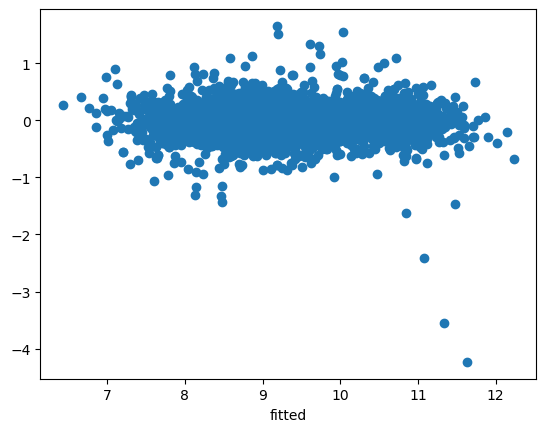

In [117]:
plt.scatter(lr_result.fittedvalues, lr_result.resid)
plt.xlabel('fitted')

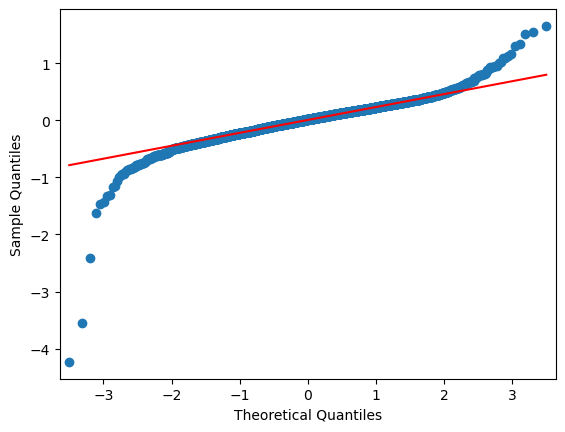

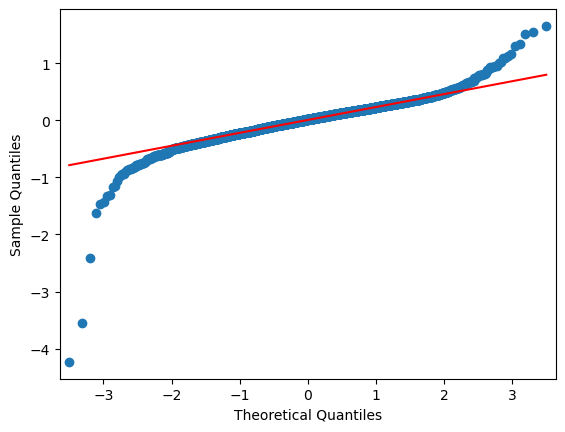

In [118]:
qqplot(lr_result.resid, line = 'q')

In [119]:
lr_result.params.values[1:]

array([-0.03321567, -0.936223  , -0.88389327, -0.90063328, -0.68859897,
       -0.52068018, -0.60817481,  0.11474851, -0.43647646,  0.20020637,
       -0.663428  , -0.60000945,  0.03948931,  0.42239396, -0.26042324,
       -0.63448382, -0.82463981,  0.36414608, -0.67356453, -0.50114341,
       -1.08862173, -0.32160674, -0.64925143, -0.23350651,  0.11197317,
        0.00308696,  0.05679346, -0.086922  ,  0.09104   , -0.08678575,
       -0.05349019, -0.24054885, -0.06323844, -0.05102847,  0.27295765,
       -0.11965629, -0.13561291, -0.0629368 , -0.14154685,  0.49718521,
       -0.04739844, -0.19202876,  0.31828957, -0.09032252])

<Axes: >

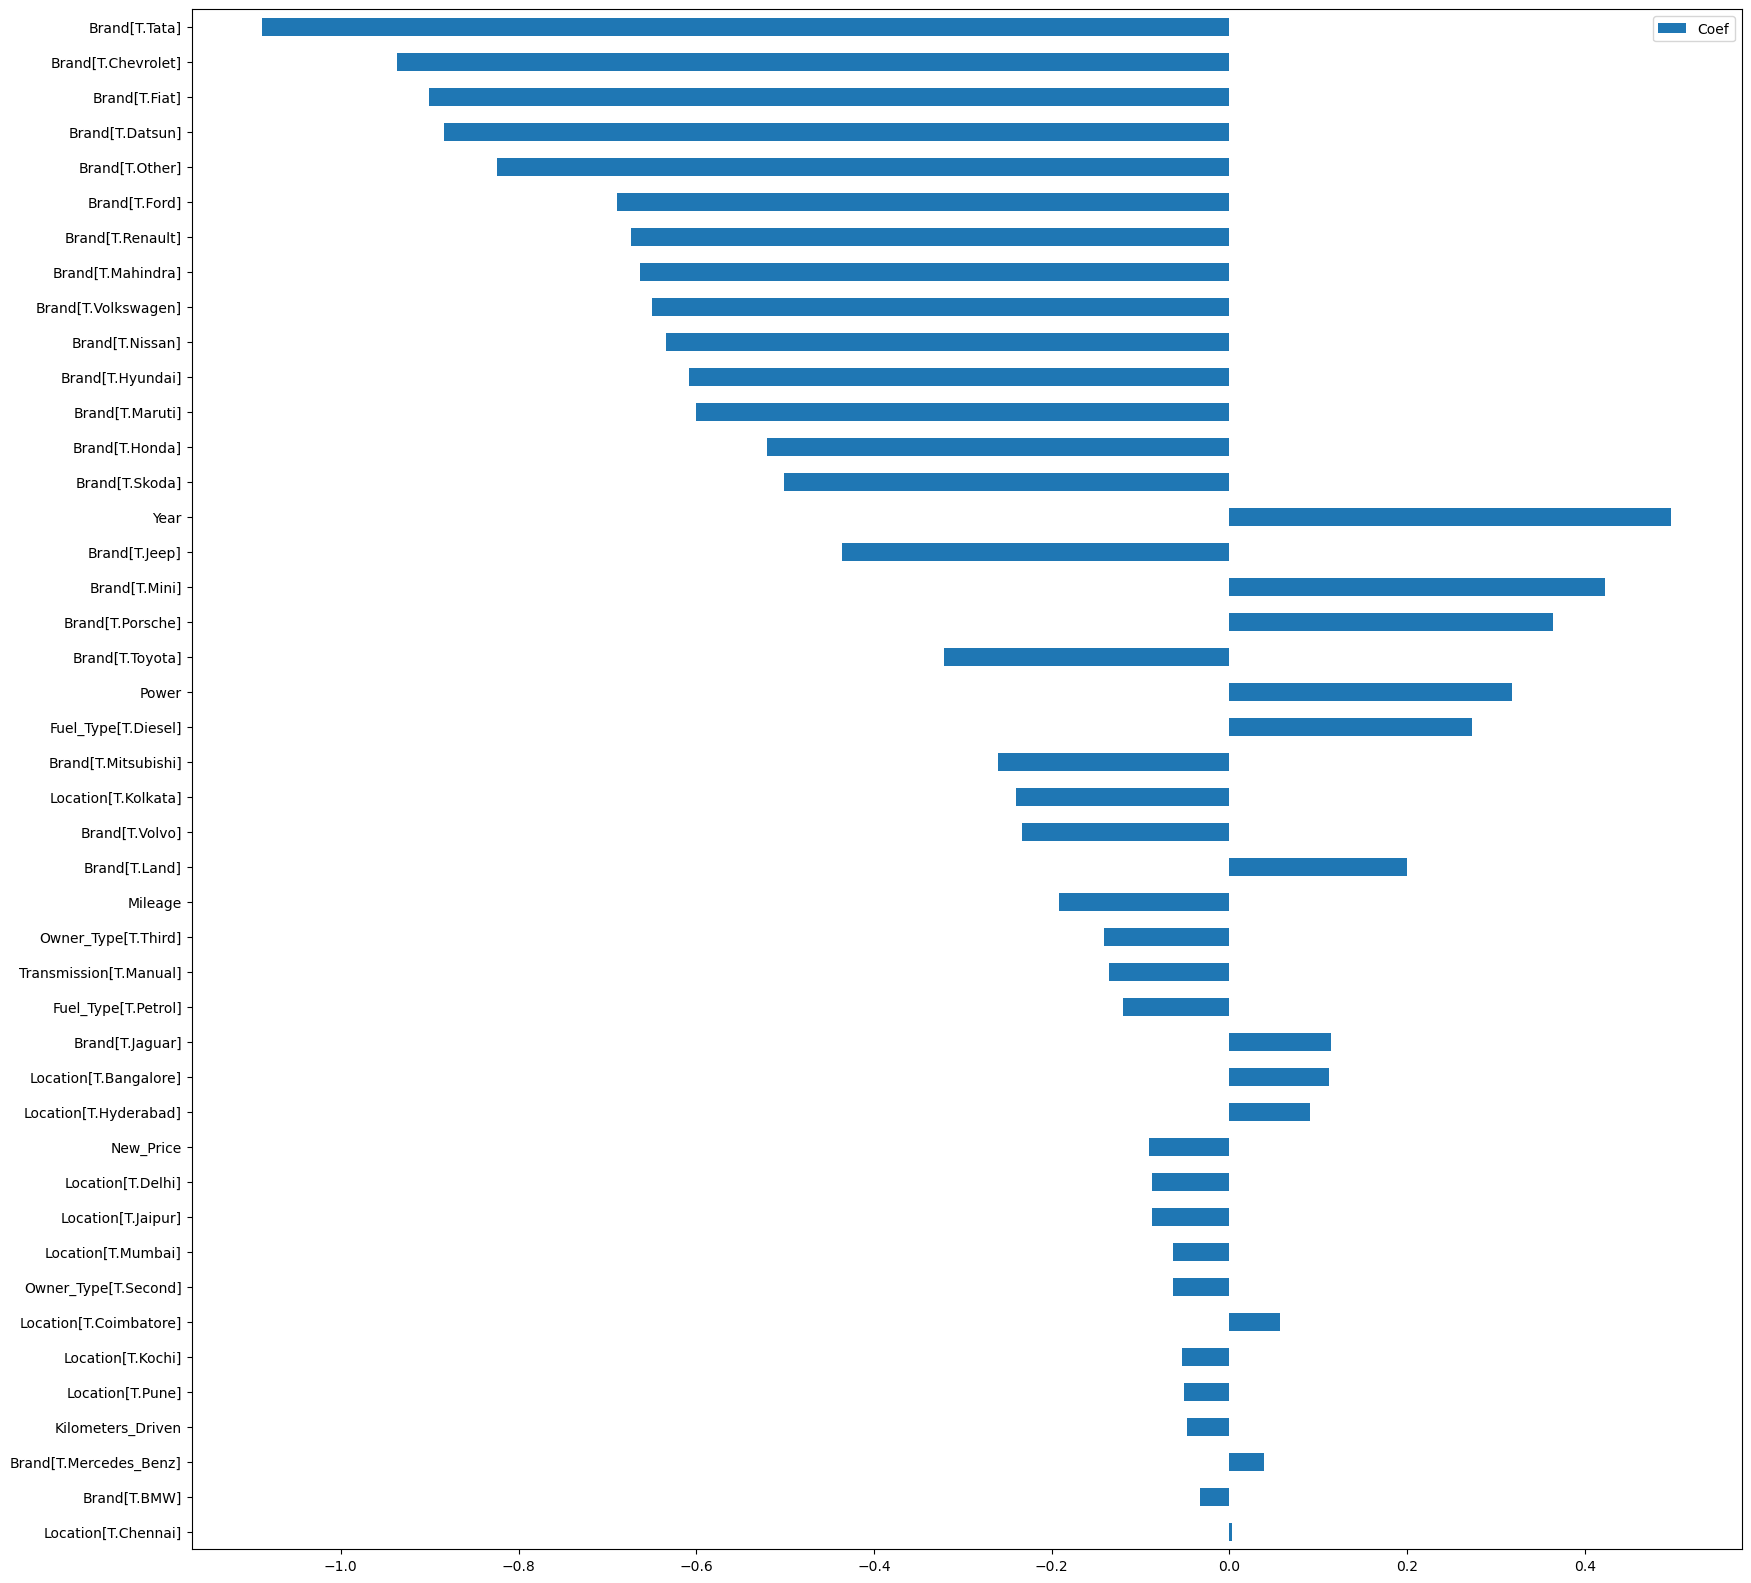

In [120]:
df_lr_coef=pd.DataFrame({'Coef':lr_result.params.values[1:],
                        'abs_Coef' : abs(lr_result.params.values[1:])},index=lr_result.params.index[1:]).sort_values('abs_Coef', ascending = True)

df_lr_coef.plot.barh(y='Coef',figsize = (20,20))

In [121]:
y_pred = lr_result.predict(df_test_x)
y_train_pred = lr_result.predict(df_train_x)

result = pd.DataFrame(columns = ['Train','Test'])
result.loc['Linear_Regression','Train'] = r2_score(y_train_pred, df_train_y)
result.loc['Linear_Regression','Test'] = r2_score(y_pred, df_test_y)


## Decision Tree

In [122]:
df_x = df.drop(['Price'], axis = 1)
df_y = df['Price']

df_x = pd.get_dummies(df_x)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = .3, random_state = 1234)

print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(4294, 50)
(4294,)
(1841, 50)
(1841,)


In [123]:
tree_uncustomized = DecisionTreeRegressor(random_state = 42)
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeRegressor(random_state=42)

In [124]:
print(tree_uncustomized.score(df_train_x, df_train_y))
print(tree_uncustomized.score(df_test_x, df_test_y))


0.9999921133966705
0.8254562676593946


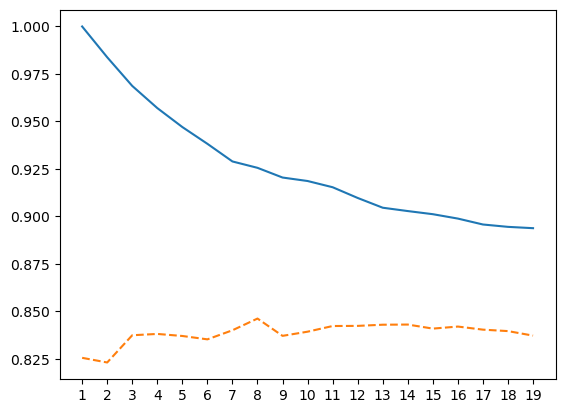

In [125]:
train_score , test_score = [],[]

para_leaf = [n_leaf for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(min_samples_leaf = v_min_samples_leaf , random_state = 42)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_leaf)
plt.show()

- 최소 노드 잎수가 너무 높은 것은 좋지 않으므로 gap은 크지만 test score 가 높은 min_samples_leaf 8를 선택하겠다.

,MinSamplesSplit,TrainScore,TestScore
0,4,0.925534,0.846142
1,6,0.925534,0.846142
2,8,0.925534,0.846142
3,10,0.925534,0.846142
4,12,0.925534,0.846142
5,14,0.925534,0.846142
6,16,0.925534,0.846142
7,18,0.923767,0.843976
8,20,0.922509,0.843861
9,22,0.921016,0.843930


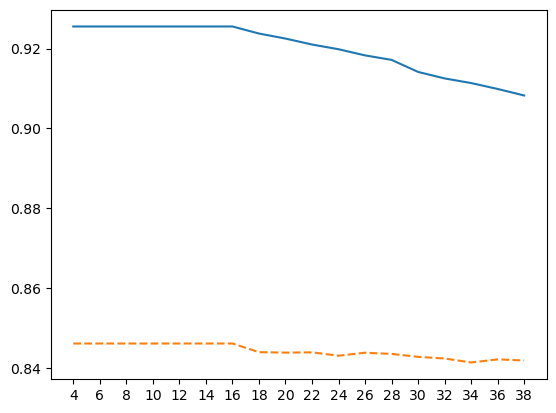

In [126]:
train_score , test_score = [],[]

para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(min_samples_split = v_min_samples_split , min_samples_leaf = 8 , random_state = 42)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
display(df_score_split)
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_split)
plt.show()

- min_samples_split는 14를 선택하여 min_samples leaf와 겹치지 않도록 하겠다.

,maxDepth,TrainScore,TestScore
0,1,0.453097,0.442420
1,2,0.631203,0.604107
2,3,0.730679,0.693448
3,4,0.798384,0.760065
4,5,0.840003,0.799936
5,6,0.866993,0.817403
6,7,0.889086,0.829488
7,8,0.903311,0.837828
8,9,0.912549,0.842274
9,10,0.917838,0.843836


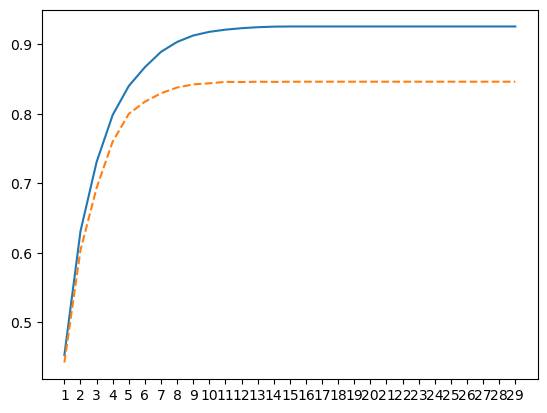

In [127]:
train_score , test_score = [],[]

para_depth = [depth for depth in range(1,30)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(max_depth = v_max_depth , min_samples_split = 16 , min_samples_leaf = 8 , random_state = 42)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['maxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
display(df_score_depth)
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_depth)
plt.show()

- max_depth 가 매우 깊진 하지만 일단 13 개 일때 제일 확률이 높으므로 선택하도록 하겠다.

In [128]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(max_depth = 13 , min_samples_split = 16 , min_samples_leaf = 8 , random_state = 42)
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

result.loc['Decision_Tree','Train'] = tree_final.score(df_train_x, df_train_y)
result.loc['Decision_Tree','Test'] = tree_final.score(df_test_x, df_test_y)
result


,Train,Test
Linear_Regression,0.895294,0.893514
Decision_Tree,0.92447,0.846116


In [130]:
parameters = pd.DataFrame(index = tree_final.get_params().keys() ,
                        data = tree_final.get_params().values(), columns = ['Parameters'])
parameters

,Parameters
ccp_alpha,0.0
criterion,squared_error
max_depth,13
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,8
min_samples_split,16
min_weight_fraction_leaf,0.0
random_state,42


Text(0, 0.5, 'variable')

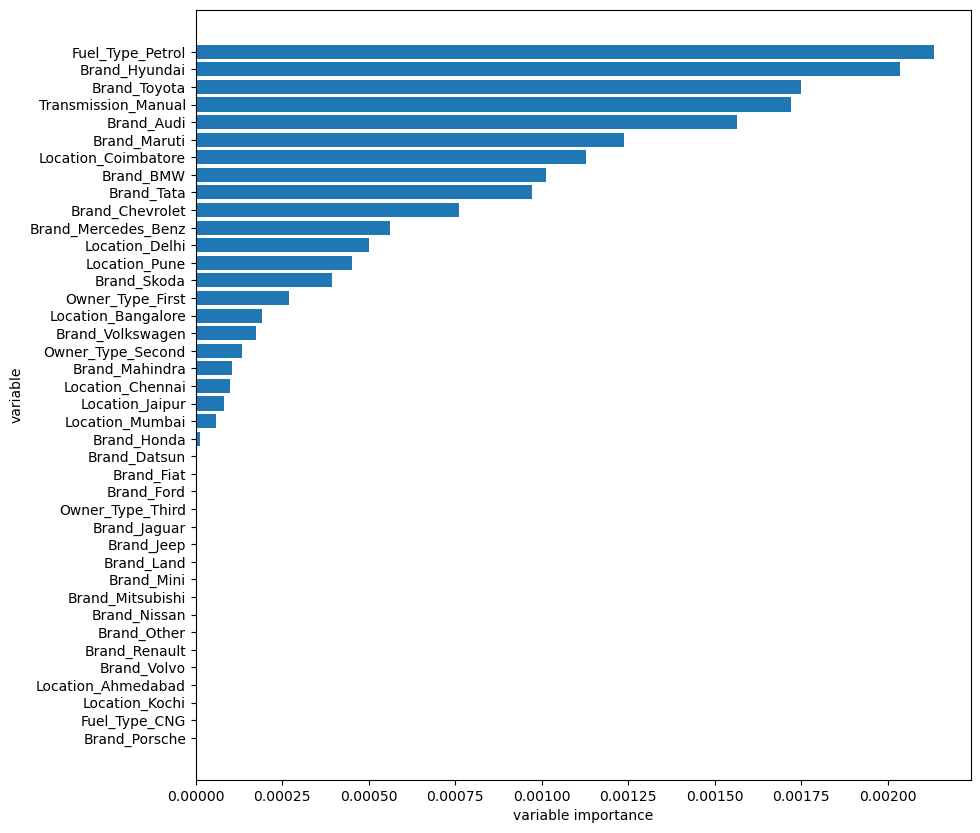

In [132]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = True, inplace = True)
df_importance = df_importance[:-10]
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('variable importance')
plt.ylabel('variable')


## 랜덤 포레스트

In [133]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print(rf_uncustomized.score(df_train_x, df_train_y))
print(rf_uncustomized.score(df_test_x, df_test_y))

0.9887965493580738
0.897950192886423


0    0.088449
1    0.087648
2    0.088056
3    0.087022
4    0.086952
5    0.086782
6    0.087073
7    0.087687
8    0.087565
9    0.087346
dtype: float64
   n_estimators  TrainScore  TestScore
0            10    0.983467   0.895018
1            20    0.986095   0.898447
2            30    0.986739   0.898682
3            40    0.987444   0.900422
4            50    0.987539   0.900587
5            60    0.987855   0.901073
6            70    0.987987   0.900915
7            80    0.988124   0.900437
8            90    0.988143   0.900578
9           100    0.988133   0.900787


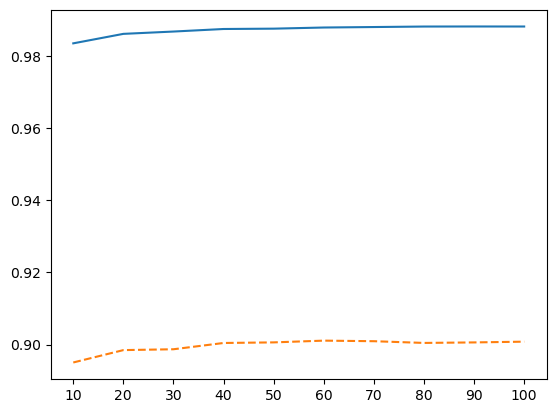

In [134]:
train_score , test_score = [],[]

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators , random_state = 42)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

print(df_score_n['TrainScore'] - df_score_n['TestScore'])
print(df_score_n)
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_n_tree)
plt.show()

- test score 가 제일 높진 않지만 gap 이 제일 적은 70을 선택하도록 하겠다.

0     0.087073
1     0.076021
2     0.069192
3     0.062341
4     0.058333
5     0.054955
6     0.052120
7     0.050276
8     0.048691
9     0.046431
10    0.045227
11    0.043582
12    0.042457
13    0.041839
14    0.041367
15    0.040494
16    0.040156
17    0.039173
18    0.038659
19    0.038181
dtype: float64


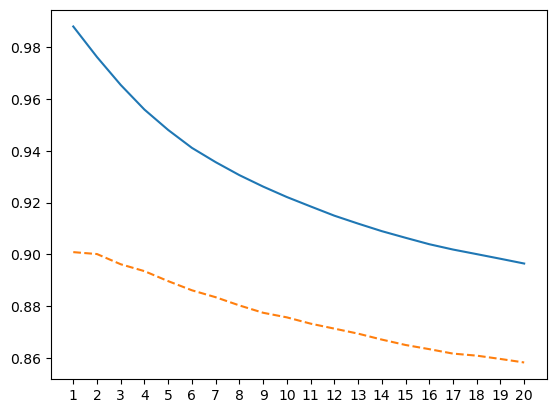

In [135]:
train_score , test_score = [],[]

para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(min_samples_leaf = v_min_samples_leaf, n_estimators = 70 , random_state = 42)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSampleLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

print(df_score_leaf['TrainScore'] - df_score_leaf['TestScore'])
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_leaf)
plt.show()

- train score , test 둘다 점점 감소하므로 지정해주지 않도록 하겠다.

0     0.080842
1     0.077825
2     0.074475
3     0.072034
4     0.069515
5     0.067727
6     0.065362
7     0.064213
8     0.062905
9     0.061015
10    0.059679
11    0.058385
12    0.056424
13    0.055296
14    0.054431
15    0.053417
16    0.052452
17    0.051665
18    0.051421
dtype: float64
    MinSampleSplit  TrainScore  TestScore
0                4    0.983024   0.902182
1                6    0.978654   0.900829
2                8    0.974923   0.900448
3               10    0.971449   0.899416
4               12    0.968335   0.898820
5               14    0.965387   0.897660
6               16    0.962570   0.897207
7               18    0.959988   0.895775
8               20    0.957645   0.894740
9               22    0.955445   0.894430
10              24    0.953121   0.893443
11              26    0.950517   0.892132
12              28    0.947970   0.891546
13              30    0.945711   0.890416
14              32    0.943556   0.889124
15              34    0.9414

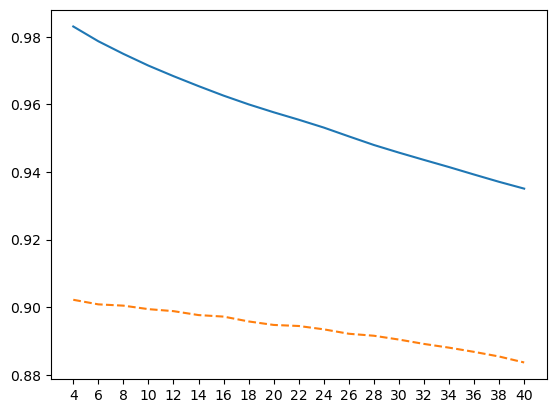

In [136]:
train_score , test_score = [],[]

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(min_samples_split = v_min_samples_split, n_estimators = 70 , random_state = 42)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSampleSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

print(df_score_split['TrainScore'] - df_score_split['TestScore'])
print(df_score_split)
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_split)
plt.show()

- min_samples_split 또한 train 과 test score가 점점 감소하고 있으므로 따로 지정해주지 않도록 하겠다.

0     0.007400
1     0.025669
2     0.023587
3     0.030819
4     0.038541
5     0.044579
6     0.051080
7     0.058424
8     0.062717
9     0.068211
10    0.073068
11    0.077171
12    0.080160
13    0.083056
14    0.084600
15    0.085338
16    0.086174
17    0.086839
18    0.086275
19    0.087504
20    0.087638
21    0.087494
22    0.086858
23    0.088293
24    0.087355
25    0.088095
26    0.087538
27    0.086653
28    0.087754
dtype: float64
    MaxDepth  TrainScore  TestScore
0          1    0.460984   0.453584
1          2    0.654919   0.629250
2          3    0.769946   0.746358
3          4    0.832896   0.802077
4          5    0.875670   0.837130
5          6    0.902551   0.857973
6          7    0.923486   0.872406
7          8    0.939110   0.880686
8          9    0.951055   0.888338
9         10    0.960636   0.892425
10        11    0.968248   0.895179
11        12    0.974190   0.897018
12        13    0.978327   0.898167
13        14    0.981512   0.898456
14        

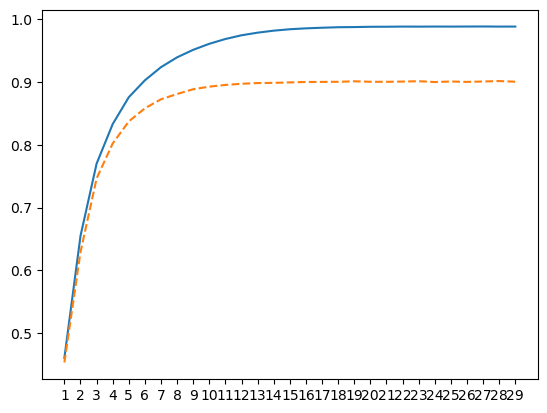

In [137]:
train_score , test_score = [],[]

para_depth = [depth for depth in range(1,30)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(max_depth = v_max_depth, n_estimators = 70 , random_state = 42)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

print(df_score_depth['TrainScore'] - df_score_depth['TestScore'])
print(df_score_depth)
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_depth)
plt.show()

- gap 이 그래도 크지 않고 test score가 높은 max_depth 28을 선택하겠다.

In [138]:
rf_final = RandomForestRegressor(max_depth = 28, n_estimators = 70 , random_state = 42)
rf_final.fit(df_train_x, df_train_y)

result.loc['Random_Forest','Train'] = rf_final.score(df_train_x, df_train_y)
result.loc['Random_Forest','Test'] = rf_final.score(df_test_x, df_test_y)

result

,Train,Test
Linear_Regression,0.895294,0.893514
Decision_Tree,0.92447,0.846116
Random_Forest,0.987983,0.90133


In [140]:
parameters = pd.DataFrame(index = rf_final.get_params().keys() ,
                        data = rf_final.get_params().values(), columns = ['Parameters'])
parameters

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,squared_error
max_depth,28
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


Text(0, 0.5, 'variable')

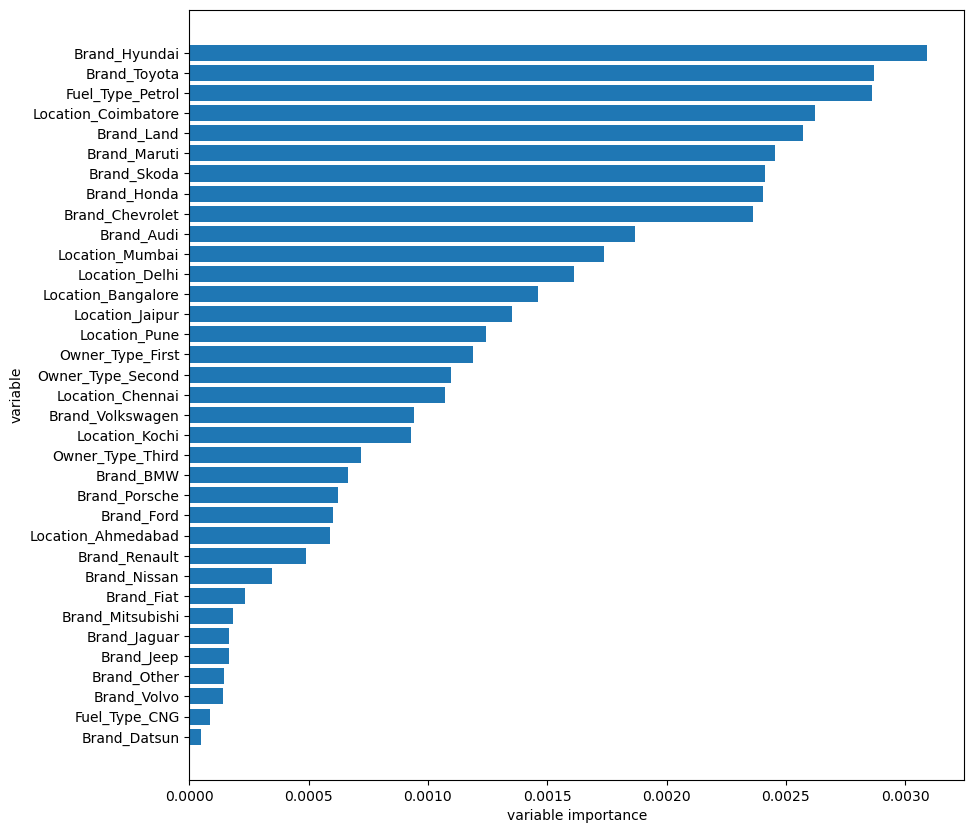

In [142]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending = True, inplace = True)
df_importance = df_importance[:-15]
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('variable importance')
plt.ylabel('variable')


## Gradient Boosting

In [143]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print(gb_uncustomized.score(df_train_x, df_train_y))
print(gb_uncustomized.score(df_test_x, df_test_y))

0.9346886228784024
0.8970024297426258


0     0.036831
1     0.034322
2     0.034644
3     0.031768
4     0.030762
5     0.029896
6     0.028609
7     0.024319
8     0.026556
9     0.025644
10    0.024058
11    0.025682
12    0.024587
13    0.025301
14    0.024476
15    0.024574
16    0.024551
17    0.027161
18    0.026104
19    0.025462
dtype: float64
    MinSampleLeaf  TrainScore  TestScore
0               1    0.934689   0.897858
1               2    0.934132   0.899810
2               3    0.932901   0.898257
3               4    0.930852   0.899084
4               5    0.929701   0.898939
5               6    0.930550   0.900654
6               7    0.929620   0.901012
7               8    0.928601   0.904282
8               9    0.929141   0.902585
9              10    0.927956   0.902312
10             11    0.927488   0.903429
11             12    0.927925   0.902243
12             13    0.927655   0.903068
13             14    0.927359   0.902058
14             15    0.926801   0.902325
15             16    0.926522

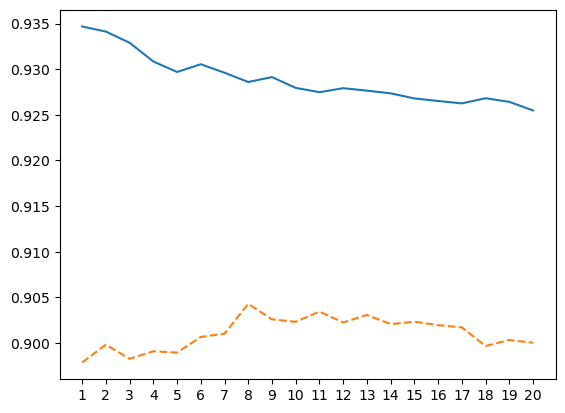

In [144]:
train_score , test_score = [],[]

para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(min_samples_leaf = v_min_samples_leaf , random_state = 42)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSampleLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

print(df_score_leaf['TrainScore'] - df_score_leaf['TestScore'])
print(df_score_leaf)
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_leaf)
plt.show()

- train score가 점점 감소하고 있으므로, test score가 제일 큰 min_samples_leaf를 8을 선택하도록 하겠다.


0     0.024319
1     0.024319
2     0.024319
3     0.024319
4     0.024319
5     0.024319
6     0.024319
7     0.024319
8     0.025609
9     0.025324
10    0.027604
11    0.025927
12    0.025924
13    0.026259
14    0.026087
15    0.026698
16    0.026458
17    0.025406
18    0.025406
19    0.026143
dtype: float64
    MinSampleLeaf  TrainScore  TestScore
0               2    0.928601   0.904282
1               4    0.928601   0.904282
2               6    0.928601   0.904282
3               8    0.928601   0.904282
4              10    0.928601   0.904282
5              12    0.928601   0.904282
6              14    0.928601   0.904282
7              16    0.928601   0.904282
8              18    0.929068   0.903459
9              20    0.929540   0.904216
10             22    0.929720   0.902117
11             24    0.928881   0.902955
12             26    0.928876   0.902952
13             28    0.928921   0.902662
14             30    0.929168   0.903081
15             32    0.928457

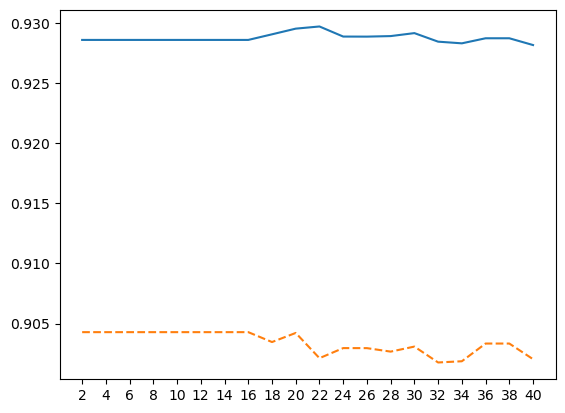

In [145]:
train_score , test_score = [],[]

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_sample_split in para_split:
    gb = GradientBoostingRegressor(min_samples_split = v_min_sample_split , min_samples_leaf = 8 , random_state = 42)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSampleLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

print(df_score_split['TrainScore'] - df_score_split['TestScore'])
print(df_score_split)
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_split)
plt.show()

test score 의 크기가 변하지 않고 gap이 가장적은 12를 선택하도록 하다.

0    0.015759
1    0.018784
2    0.024319
3    0.034164
4    0.042415
5    0.047384
6    0.055504
7    0.061517
8    0.065505
9    0.068736
dtype: float64
   MaxDepth  TrainScore  TestScore
0         1    0.863309   0.847549
1         2    0.909193   0.890409
2         3    0.928601   0.904282
3         4    0.945277   0.911113
4         5    0.955876   0.913461
5         6    0.964859   0.917475
6         7    0.972370   0.916866
7         8    0.978422   0.916905
8         9    0.981204   0.915699
9        10    0.983908   0.915172


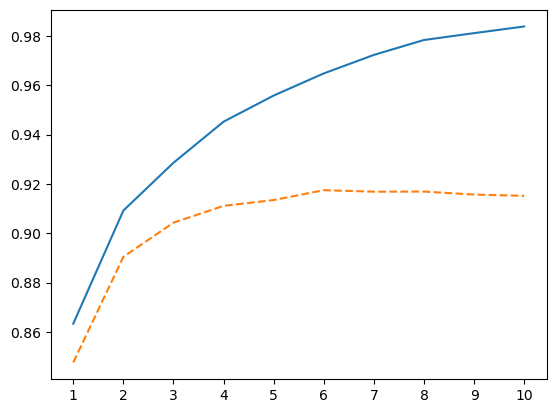

In [146]:
train_score , test_score = [],[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(max_depth = v_max_depth, min_samples_split = 12 , min_samples_leaf = 8 , random_state = 42)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

print(df_score_depth['TrainScore'] - df_score_depth['TestScore'])
print(df_score_depth)
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_depth)
plt.show()

- max_depth 를 6으로 설정해두기로 하겠다.

0     0.022641
1     0.031873
2     0.036420
3     0.038279
4     0.041238
5     0.042993
6     0.044658
7     0.045702
8     0.046299
9     0.047384
10    0.047042
11    0.050815
12    0.051207
13    0.053404
14    0.053238
15    0.055266
16    0.058166
17    0.056318
18    0.055344
19    0.055258
20    0.054275
21    0.058221
22    0.057639
23    0.061748
24    0.057968
25    0.062636
26    0.066945
27    0.065197
28    0.066322
dtype: float64
    LearningRate  TrainScore  TestScore
0           0.01    0.774721   0.752080
1           0.02    0.907462   0.875589
2           0.03    0.937435   0.901016
3           0.04    0.947905   0.909626
4           0.05    0.953167   0.911928
5           0.06    0.957541   0.914549
6           0.07    0.959429   0.914771
7           0.08    0.960857   0.915155
8           0.09    0.962291   0.915992
9           0.10    0.964859   0.917475
10          0.11    0.965002   0.917960
11          0.12    0.969088   0.918273
12          0.13    0.968253  

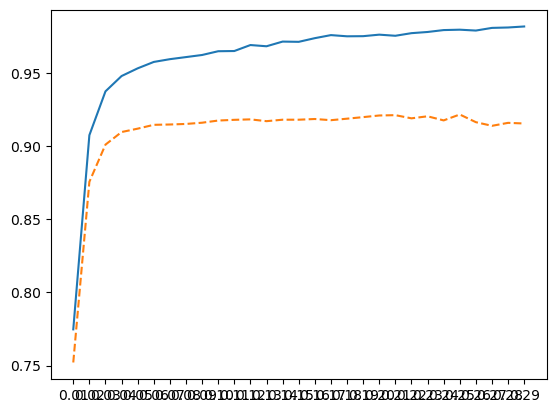

In [147]:
train_score , test_score = [],[]

para_lr = [lr * 0.01 for lr in range(1,30)]

for v_learning in para_lr:
    gb = GradientBoostingRegressor(learning_rate = v_learning, max_depth = 6, min_samples_split = 12 , min_samples_leaf = 8 , random_state = 42)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

print(df_score_lr['TrainScore'] - df_score_lr['TestScore'])
print(df_score_lr)
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_lr)
plt.show()

- 0.25가 제일 test score가 높으므로 선택하도록 하겠다.

0     0.036394
1     0.041566
2     0.044833
3     0.048333
4     0.050551
5     0.051613
6     0.053240
7     0.054216
8     0.055874
9     0.057968
10    0.058875
11    0.060372
12    0.061898
13    0.063104
14    0.063991
15    0.065023
16    0.065431
17    0.066239
18    0.067080
19    0.067730
dtype: float64
    n_estimators  TrainScore  TestScore
0             10    0.928892   0.892498
1             20    0.951071   0.909505
2             30    0.959071   0.914239
3             40    0.964591   0.916258
4             50    0.969080   0.918529
5             60    0.971186   0.919573
6             70    0.973414   0.920174
7             80    0.975402   0.921186
8             90    0.977525   0.921651
9            100    0.979583   0.921615
10           110    0.980754   0.921878
11           120    0.982385   0.922013
12           130    0.983474   0.921576
13           140    0.984548   0.921444
14           150    0.985209   0.921218
15           160    0.986217   0.921194
16   

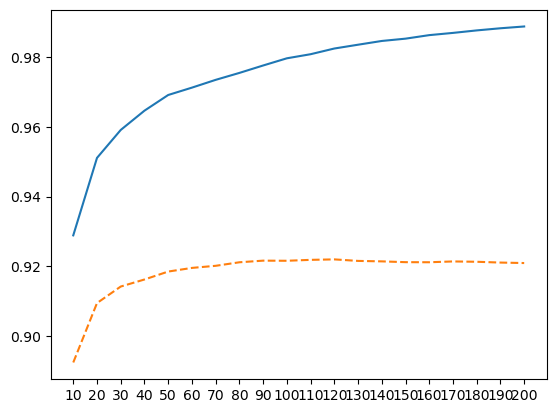

In [148]:
train_score , test_score = [],[]

para_n_tree = [n_tree * 10 for n_tree in range(1,21)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, learning_rate = 0.25, max_depth = 6, min_samples_split = 12 , min_samples_leaf = 8 , random_state = 42)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_estimators = pd.DataFrame()
df_score_estimators['n_estimators'] = para_n_tree
df_score_estimators['TrainScore'] = train_score
df_score_estimators['TestScore'] = test_score

print(df_score_estimators['TrainScore'] - df_score_estimators['TestScore'])
print(df_score_estimators)
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.xticks(para_n_tree)
plt.show()

- 190을 선택하도록 하겠다.

In [149]:
gb_final = GradientBoostingRegressor(n_estimators = 120, learning_rate = 0.25, max_depth = 6, min_samples_split = 12 , min_samples_leaf = 8 , random_state = 42)

gb_final.fit(df_train_x, df_train_y)

result.loc['Gradient_Boosting', 'Train'] = gb_final.score(df_train_x, df_train_y)
result.loc['Gradient_Boosting', 'Test'] = gb_final.score(df_test_x, df_test_y)
result

,Train,Test
Linear_Regression,0.895294,0.893514
Decision_Tree,0.92447,0.846116
Random_Forest,0.987983,0.90133
Gradient_Boosting,0.982385,0.922013


In [151]:
parameters = pd.DataFrame(index = gb_final.get_params().keys() ,
                        data = gb_final.get_params().values(), columns = ['Parameters'])
parameters

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.25
loss,squared_error
max_depth,6
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


Text(0, 0.5, 'variable')

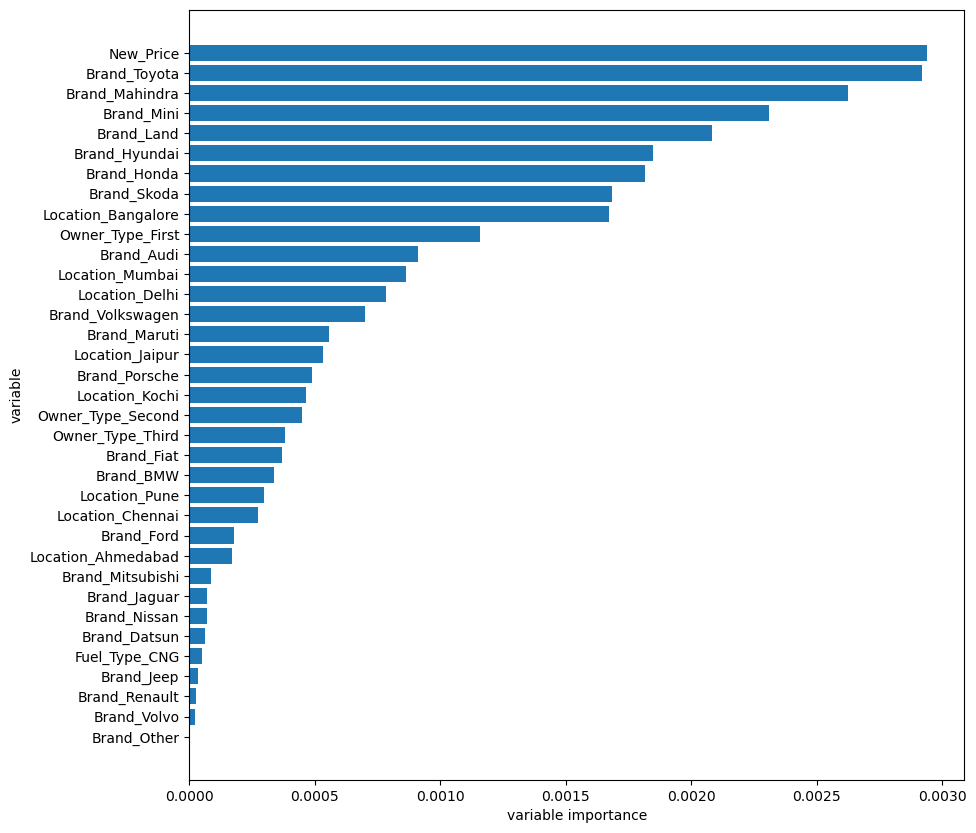

In [153]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance', ascending = True, inplace = True)
df_importance = df_importance[:-15]
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('variable importance')
plt.ylabel('variable')
